In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from ucimlrepo import fetch_ucirepo

bank_marketing = fetch_ucirepo(id=222)

X = bank_marketing.data.features
y = bank_marketing.data.targets

print(bank_marketing.metadata)

print(bank_marketing.variables)

{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

In [3]:
import pandas as pd

df = pd.concat([X, y], axis=1)

df = df.drop(columns='duration')

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,1,-1,0,NaN,no


In [4]:
df[df.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,campaign,pdays,previous,poutcome,y
2871,44,services,single,secondary,no,0,yes,no,NaN,14,may,1,-1,0,NaN,no
4910,34,management,single,tertiary,no,0,yes,no,NaN,21,may,1,-1,0,NaN,no
12939,25,blue-collar,married,primary,no,0,no,no,cellular,7,jul,1,-1,0,NaN,no
13662,47,services,married,secondary,no,0,yes,no,cellular,9,jul,1,-1,0,NaN,no
15836,35,management,married,tertiary,no,0,yes,no,cellular,21,jul,3,-1,0,NaN,no
21522,47,technician,married,secondary,no,0,no,no,cellular,19,aug,2,-1,0,NaN,no
22157,31,management,single,tertiary,no,0,no,no,cellular,21,aug,2,-1,0,NaN,no
22210,32,technician,single,tertiary,no,0,no,no,cellular,21,aug,2,-1,0,NaN,no
22233,34,management,single,tertiary,no,0,no,no,cellular,21,aug,2,-1,0,NaN,no
22418,30,technician,single,tertiary,no,0,no,no,cellular,22,aug,2,-1,0,NaN,no


In [5]:
df.isna().sum()

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
campaign           0
pdays              0
previous           0
poutcome       36959
y                  0
dtype: int64

In [6]:
# Handle null values
# For categorical columns, nulls often indicate 'unknown' - preserve this information
df['job'] = df['job'].fillna('unknown')
df['education'] = df['education'].fillna('unknown')
df['contact'] = df['contact'].fillna('unknown')
df['poutcome'] = df['poutcome'].fillna('none')  # No previous campaign

# Verify no nulls remain
df.isna().sum()

age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
contact        0
day_of_week    0
month          0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [7]:
# categorical
    # Education mapping
edu_map = {'unknown': 0, 'primary': 1, 'secondary': 2, 'tertiary': 3}
df['education'] = df['education'].map(edu_map)


# One Hot encoding
df = pd.get_dummies(df, columns=['job', 'marital', 'contact', 'poutcome', 'month'], drop_first=True)

# binary
binary_cols = ['default', 'housing', 'loan', 'y']
for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})

df.dtypes # print result

age                  int64
education            int64
default              int64
balance              int64
housing              int64
loan                 int64
day_of_week          int64
campaign             int64
pdays                int64
previous             int64
y                    int64
job_blue-collar       bool
job_entrepreneur      bool
job_housemaid         bool
job_management        bool
job_retired           bool
job_self-employed     bool
job_services          bool
job_student           bool
job_technician        bool
job_unemployed        bool
job_unknown           bool
marital_married       bool
marital_single        bool
contact_telephone     bool
contact_unknown       bool
poutcome_none         bool
poutcome_other        bool
poutcome_success      bool
month_aug             bool
month_dec             bool
month_feb             bool
month_jan             bool
month_jul             bool
month_jun             bool
month_mar             bool
month_may             bool
m

In [11]:
from perceptron import Perceptron
from trainer import Trainer

perceptron = Perceptron(2, 1)
trainer = Trainer(perceptron=perceptron, n_epochs=1000, learning_rate=0.01)
trainer1 = Trainer(perceptron=perceptron, n_epochs=1000, learning_rate=0.02)
trainer2 = Trainer(perceptron=perceptron, n_epochs=1000, learning_rate=0.1)
trainer3 = Trainer(perceptron=perceptron, n_epochs=10000, learning_rate=0.01)
trainer4 = Trainer(perceptron=perceptron, n_epochs=1000, learning_rate=0.001)

In [12]:
# Prepare data: extract age and balance features
x_features = df[['age', 'balance']].values  # shape: (samples, features)
y_target = df['y'].values  # shape: (samples,)

# Split into train/test sets
from sklearn.model_selection import train_test_split
x_train, X_test_val, y_train, y_test_val = train_test_split(
    x_features, y_target, test_size=0.3, random_state=42
)
x_val, x_test, y_val, y_test = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=42)

# Transpose to match perceptron format: (features, samples)
x_train_t = x_train.T
x_val_t = x_val.T
x_test_t = x_test.T

print(f"Training set: {x_train_t.shape[1]} samples, {x_train_t.shape[0]} features")
print(f"Test set: {x_test_t.shape[1]} samples")
print(f"Class distribution in training: {y_train.sum()} positive, {len(y_train) - y_train.sum()} negative")

Training set: 31647 samples, 2 features
Test set: 6782 samples
Class distribution in training: 3691 positive, 27956 negative


Testing trainer with params 
lr: 0.01 
epochs: 1000 
Epoch 0: Loss 6.5183, Accuracy: 80.8%


Testing trainer with params 
lr: 0.01 
epochs: 1000 
Epoch 0: Loss 6.5183, Accuracy: 80.8%


c:\Users\dorot\OneDrive\Desktop\Maciek\code\perceptron\perceptron.py:14: RuntimeWarning: overflow encountered in power
  return 1 / (1 + np.power(np.e, -Z))


Testing trainer with params 
lr: 0.01 
epochs: 1000 
Epoch 0: Loss 6.5183, Accuracy: 80.8%


c:\Users\dorot\OneDrive\Desktop\Maciek\code\perceptron\perceptron.py:14: RuntimeWarning: overflow encountered in power
  return 1 / (1 + np.power(np.e, -Z))


Epoch 100: Loss 6.2984, Accuracy: 83.0%
Epoch 200: Loss 6.3573, Accuracy: 81.7%
Epoch 200: Loss 6.3573, Accuracy: 81.7%
Epoch 300: Loss 20.7580, Accuracy: 81.6%
Epoch 300: Loss 20.7580, Accuracy: 81.6%
Epoch 400: Loss 5.8173, Accuracy: 87.6%
Epoch 400: Loss 5.8173, Accuracy: 87.6%
Epoch 500: Loss 6.2135, Accuracy: 82.4%
Epoch 500: Loss 6.2135, Accuracy: 82.4%
Epoch 600: Loss 19.3026, Accuracy: 81.8%
Epoch 600: Loss 19.3026, Accuracy: 81.8%
Epoch 700: Loss 5.5194, Accuracy: 88.3%
Epoch 700: Loss 5.5194, Accuracy: 88.3%
Epoch 800: Loss 6.1123, Accuracy: 82.8%
Epoch 800: Loss 6.1123, Accuracy: 82.8%
Epoch 900: Loss 18.8139, Accuracy: 82.0%
Epoch 900: Loss 18.8139, Accuracy: 82.0%

Final Test Accuracy: 85.05%
Predictions shape: (1, 6782)
Sample predictions: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0

Testing trainer with params 
lr: 0.01 
epochs: 1000 
Epoch 0: Loss 6.5183, Accuracy: 80.8%


c:\Users\dorot\OneDrive\Desktop\Maciek\code\perceptron\perceptron.py:14: RuntimeWarning: overflow encountered in power
  return 1 / (1 + np.power(np.e, -Z))


Epoch 100: Loss 6.2984, Accuracy: 83.0%
Epoch 200: Loss 6.3573, Accuracy: 81.7%
Epoch 200: Loss 6.3573, Accuracy: 81.7%
Epoch 300: Loss 20.7580, Accuracy: 81.6%
Epoch 300: Loss 20.7580, Accuracy: 81.6%
Epoch 400: Loss 5.8173, Accuracy: 87.6%
Epoch 400: Loss 5.8173, Accuracy: 87.6%
Epoch 500: Loss 6.2135, Accuracy: 82.4%
Epoch 500: Loss 6.2135, Accuracy: 82.4%
Epoch 600: Loss 19.3026, Accuracy: 81.8%
Epoch 600: Loss 19.3026, Accuracy: 81.8%
Epoch 700: Loss 5.5194, Accuracy: 88.3%
Epoch 700: Loss 5.5194, Accuracy: 88.3%
Epoch 800: Loss 6.1123, Accuracy: 82.8%
Epoch 800: Loss 6.1123, Accuracy: 82.8%
Epoch 900: Loss 18.8139, Accuracy: 82.0%
Epoch 900: Loss 18.8139, Accuracy: 82.0%

Final Test Accuracy: 85.05%
Predictions shape: (1, 6782)
Sample predictions: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0

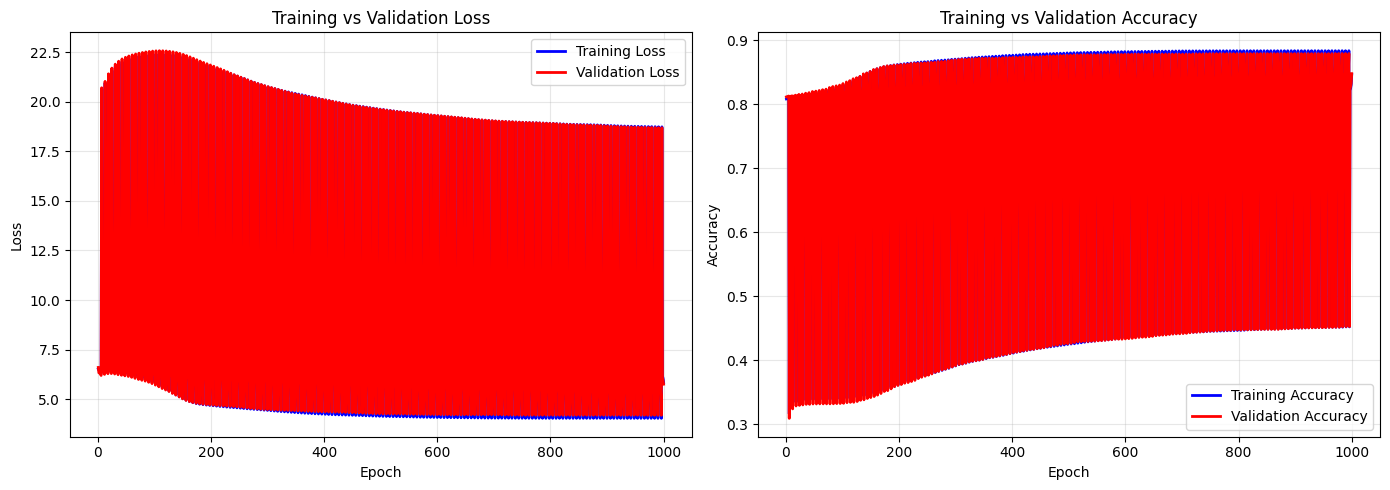

Testing trainer with params 
lr: 0.01 
epochs: 1000 
Epoch 0: Loss 6.5183, Accuracy: 80.8%


c:\Users\dorot\OneDrive\Desktop\Maciek\code\perceptron\perceptron.py:14: RuntimeWarning: overflow encountered in power
  return 1 / (1 + np.power(np.e, -Z))


Epoch 100: Loss 6.2984, Accuracy: 83.0%
Epoch 200: Loss 6.3573, Accuracy: 81.7%
Epoch 200: Loss 6.3573, Accuracy: 81.7%
Epoch 300: Loss 20.7580, Accuracy: 81.6%
Epoch 300: Loss 20.7580, Accuracy: 81.6%
Epoch 400: Loss 5.8173, Accuracy: 87.6%
Epoch 400: Loss 5.8173, Accuracy: 87.6%
Epoch 500: Loss 6.2135, Accuracy: 82.4%
Epoch 500: Loss 6.2135, Accuracy: 82.4%
Epoch 600: Loss 19.3026, Accuracy: 81.8%
Epoch 600: Loss 19.3026, Accuracy: 81.8%
Epoch 700: Loss 5.5194, Accuracy: 88.3%
Epoch 700: Loss 5.5194, Accuracy: 88.3%
Epoch 800: Loss 6.1123, Accuracy: 82.8%
Epoch 800: Loss 6.1123, Accuracy: 82.8%
Epoch 900: Loss 18.8139, Accuracy: 82.0%
Epoch 900: Loss 18.8139, Accuracy: 82.0%

Final Test Accuracy: 85.05%
Predictions shape: (1, 6782)
Sample predictions: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0

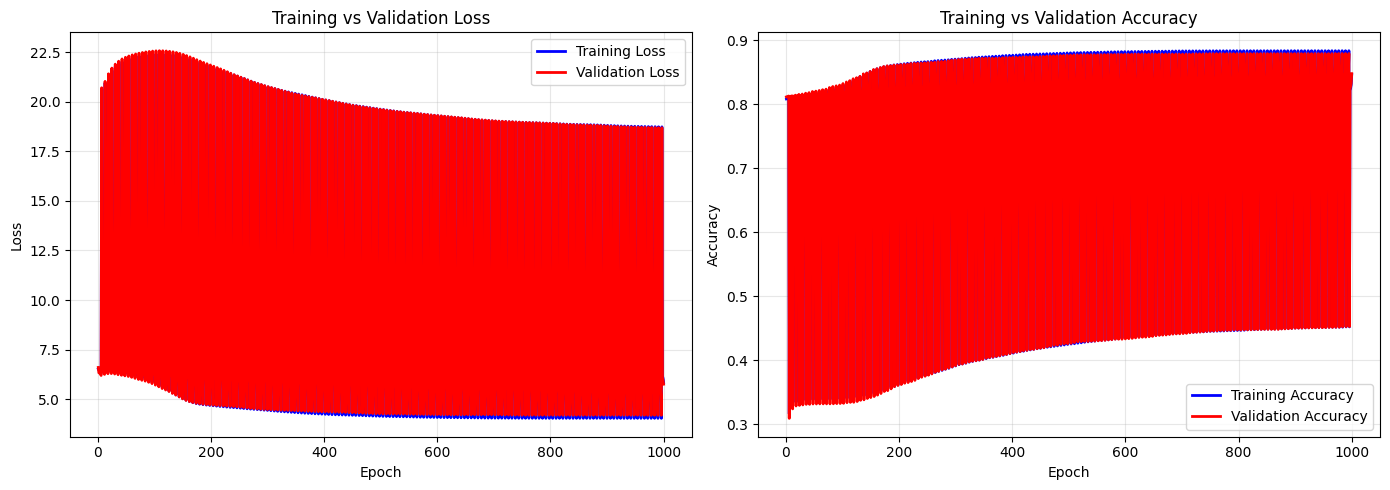

Testing trainer with params 
lr: 0.02 
epochs: 1000 
Epoch 0: Loss 5.2783, Accuracy: 43.8%
Epoch 100: Loss 6.1312, Accuracy: 83.1%
Epoch 100: Loss 6.1312, Accuracy: 83.1%
Epoch 200: Loss 6.2920, Accuracy: 82.0%
Epoch 200: Loss 6.2920, Accuracy: 82.0%
Epoch 300: Loss 4.0707, Accuracy: 43.5%
Epoch 300: Loss 4.0707, Accuracy: 43.5%
Epoch 400: Loss 5.9727, Accuracy: 83.9%
Epoch 400: Loss 5.9727, Accuracy: 83.9%
Epoch 500: Loss 6.2157, Accuracy: 82.3%
Epoch 500: Loss 6.2157, Accuracy: 82.3%
Epoch 600: Loss 4.0283, Accuracy: 45.0%
Epoch 600: Loss 4.0283, Accuracy: 45.0%
Epoch 700: Loss 5.8376, Accuracy: 84.6%
Epoch 700: Loss 5.8376, Accuracy: 84.6%
Epoch 800: Loss 6.1516, Accuracy: 82.5%
Epoch 800: Loss 6.1516, Accuracy: 82.5%
Epoch 900: Loss 4.0283, Accuracy: 46.5%
Epoch 900: Loss 4.0283, Accuracy: 46.5%

Final Test Accuracy: 82.73%
Predictions shape: (1, 6782)
Sample predictions: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

Testing trainer with params 
lr: 0.01 
epochs: 1000 
Epoch 0: Loss 6.5183, Accuracy: 80.8%


c:\Users\dorot\OneDrive\Desktop\Maciek\code\perceptron\perceptron.py:14: RuntimeWarning: overflow encountered in power
  return 1 / (1 + np.power(np.e, -Z))


Epoch 100: Loss 6.2984, Accuracy: 83.0%
Epoch 200: Loss 6.3573, Accuracy: 81.7%
Epoch 200: Loss 6.3573, Accuracy: 81.7%
Epoch 300: Loss 20.7580, Accuracy: 81.6%
Epoch 300: Loss 20.7580, Accuracy: 81.6%
Epoch 400: Loss 5.8173, Accuracy: 87.6%
Epoch 400: Loss 5.8173, Accuracy: 87.6%
Epoch 500: Loss 6.2135, Accuracy: 82.4%
Epoch 500: Loss 6.2135, Accuracy: 82.4%
Epoch 600: Loss 19.3026, Accuracy: 81.8%
Epoch 600: Loss 19.3026, Accuracy: 81.8%
Epoch 700: Loss 5.5194, Accuracy: 88.3%
Epoch 700: Loss 5.5194, Accuracy: 88.3%
Epoch 800: Loss 6.1123, Accuracy: 82.8%
Epoch 800: Loss 6.1123, Accuracy: 82.8%
Epoch 900: Loss 18.8139, Accuracy: 82.0%
Epoch 900: Loss 18.8139, Accuracy: 82.0%

Final Test Accuracy: 85.05%
Predictions shape: (1, 6782)
Sample predictions: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0

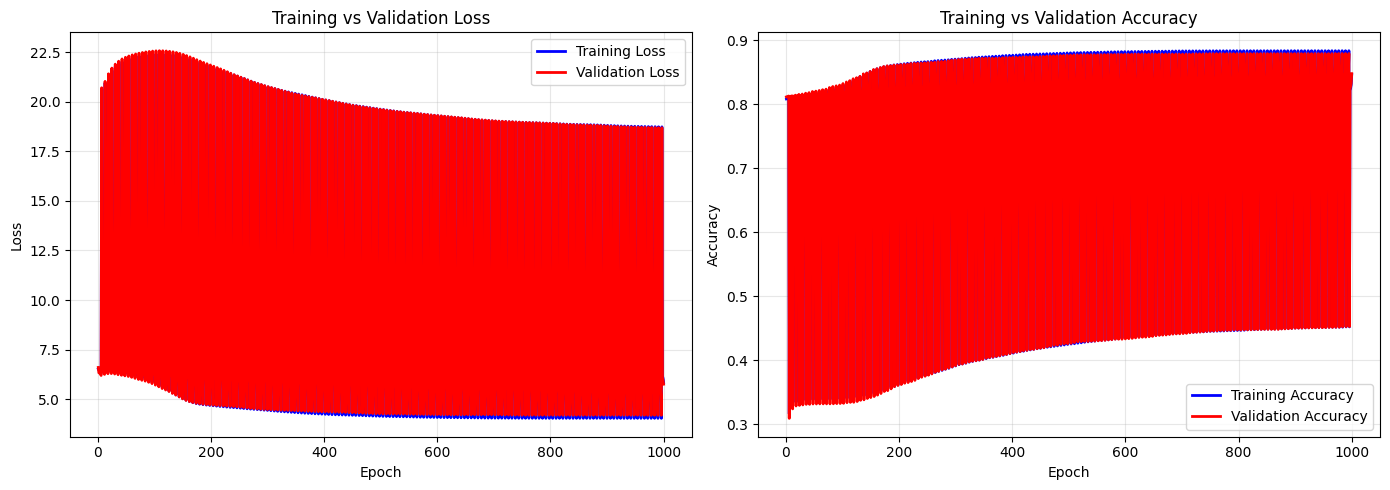

Testing trainer with params 
lr: 0.02 
epochs: 1000 
Epoch 0: Loss 5.2783, Accuracy: 43.8%
Epoch 100: Loss 6.1312, Accuracy: 83.1%
Epoch 100: Loss 6.1312, Accuracy: 83.1%
Epoch 200: Loss 6.2920, Accuracy: 82.0%
Epoch 200: Loss 6.2920, Accuracy: 82.0%
Epoch 300: Loss 4.0707, Accuracy: 43.5%
Epoch 300: Loss 4.0707, Accuracy: 43.5%
Epoch 400: Loss 5.9727, Accuracy: 83.9%
Epoch 400: Loss 5.9727, Accuracy: 83.9%
Epoch 500: Loss 6.2157, Accuracy: 82.3%
Epoch 500: Loss 6.2157, Accuracy: 82.3%
Epoch 600: Loss 4.0283, Accuracy: 45.0%
Epoch 600: Loss 4.0283, Accuracy: 45.0%
Epoch 700: Loss 5.8376, Accuracy: 84.6%
Epoch 700: Loss 5.8376, Accuracy: 84.6%
Epoch 800: Loss 6.1516, Accuracy: 82.5%
Epoch 800: Loss 6.1516, Accuracy: 82.5%
Epoch 900: Loss 4.0283, Accuracy: 46.5%
Epoch 900: Loss 4.0283, Accuracy: 46.5%

Final Test Accuracy: 82.73%
Predictions shape: (1, 6782)
Sample predictions: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

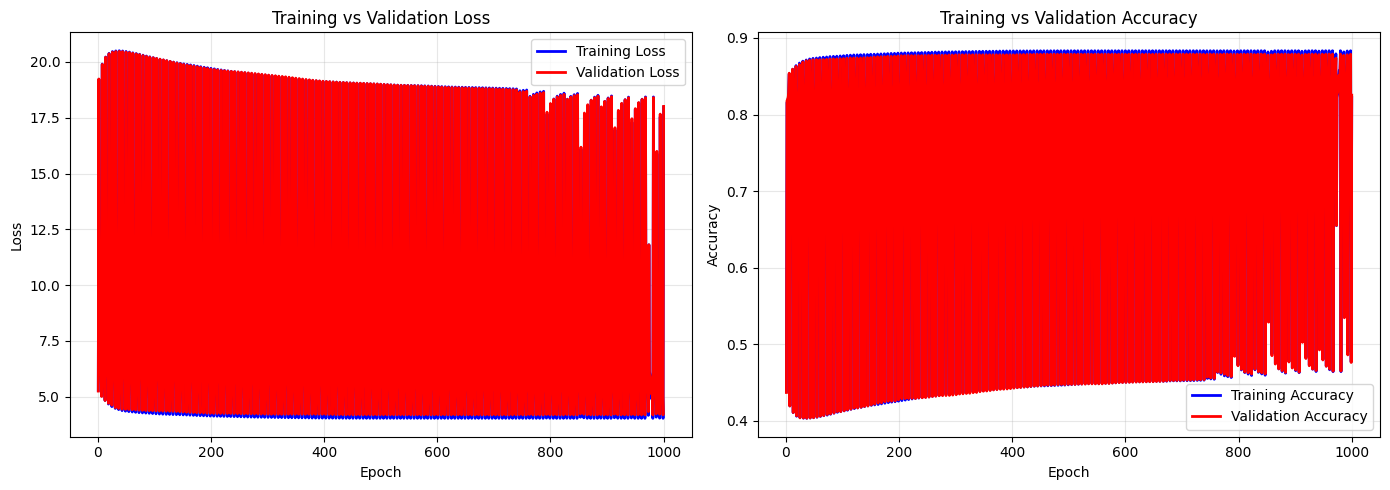

Testing trainer with params 
lr: 0.01 
epochs: 1000 
Epoch 0: Loss 6.5183, Accuracy: 80.8%


c:\Users\dorot\OneDrive\Desktop\Maciek\code\perceptron\perceptron.py:14: RuntimeWarning: overflow encountered in power
  return 1 / (1 + np.power(np.e, -Z))


Epoch 100: Loss 6.2984, Accuracy: 83.0%
Epoch 200: Loss 6.3573, Accuracy: 81.7%
Epoch 200: Loss 6.3573, Accuracy: 81.7%
Epoch 300: Loss 20.7580, Accuracy: 81.6%
Epoch 300: Loss 20.7580, Accuracy: 81.6%
Epoch 400: Loss 5.8173, Accuracy: 87.6%
Epoch 400: Loss 5.8173, Accuracy: 87.6%
Epoch 500: Loss 6.2135, Accuracy: 82.4%
Epoch 500: Loss 6.2135, Accuracy: 82.4%
Epoch 600: Loss 19.3026, Accuracy: 81.8%
Epoch 600: Loss 19.3026, Accuracy: 81.8%
Epoch 700: Loss 5.5194, Accuracy: 88.3%
Epoch 700: Loss 5.5194, Accuracy: 88.3%
Epoch 800: Loss 6.1123, Accuracy: 82.8%
Epoch 800: Loss 6.1123, Accuracy: 82.8%
Epoch 900: Loss 18.8139, Accuracy: 82.0%
Epoch 900: Loss 18.8139, Accuracy: 82.0%

Final Test Accuracy: 85.05%
Predictions shape: (1, 6782)
Sample predictions: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0

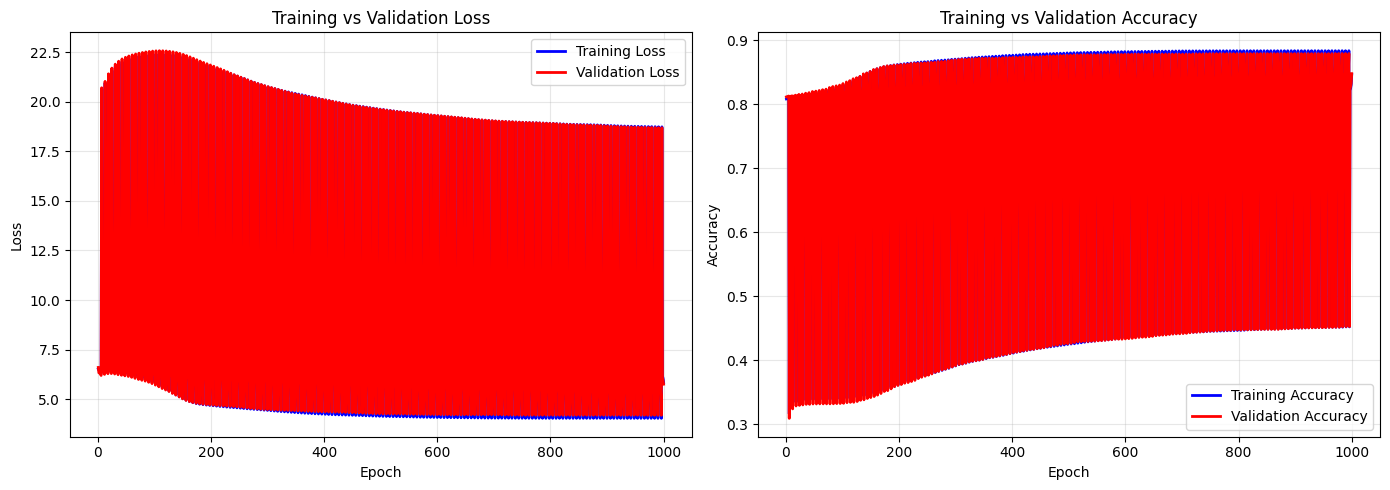

Testing trainer with params 
lr: 0.02 
epochs: 1000 
Epoch 0: Loss 5.2783, Accuracy: 43.8%
Epoch 100: Loss 6.1312, Accuracy: 83.1%
Epoch 100: Loss 6.1312, Accuracy: 83.1%
Epoch 200: Loss 6.2920, Accuracy: 82.0%
Epoch 200: Loss 6.2920, Accuracy: 82.0%
Epoch 300: Loss 4.0707, Accuracy: 43.5%
Epoch 300: Loss 4.0707, Accuracy: 43.5%
Epoch 400: Loss 5.9727, Accuracy: 83.9%
Epoch 400: Loss 5.9727, Accuracy: 83.9%
Epoch 500: Loss 6.2157, Accuracy: 82.3%
Epoch 500: Loss 6.2157, Accuracy: 82.3%
Epoch 600: Loss 4.0283, Accuracy: 45.0%
Epoch 600: Loss 4.0283, Accuracy: 45.0%
Epoch 700: Loss 5.8376, Accuracy: 84.6%
Epoch 700: Loss 5.8376, Accuracy: 84.6%
Epoch 800: Loss 6.1516, Accuracy: 82.5%
Epoch 800: Loss 6.1516, Accuracy: 82.5%
Epoch 900: Loss 4.0283, Accuracy: 46.5%
Epoch 900: Loss 4.0283, Accuracy: 46.5%

Final Test Accuracy: 82.73%
Predictions shape: (1, 6782)
Sample predictions: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

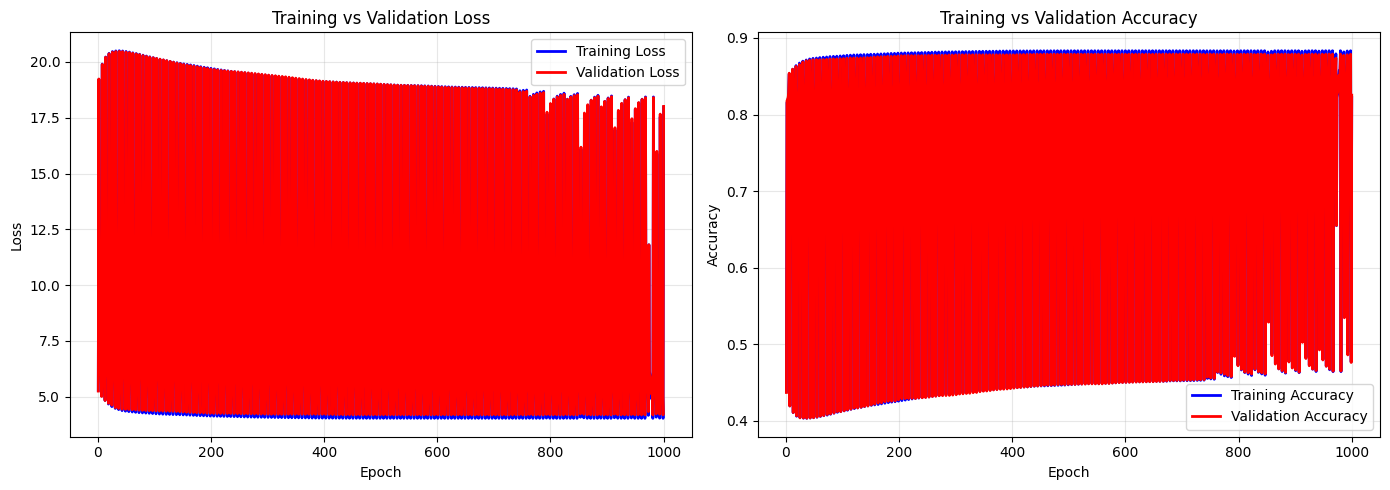

Testing trainer with params 
lr: 0.1 
epochs: 1000 
Epoch 0: Loss 6.1364, Accuracy: 45.0%
Epoch 100: Loss 6.2910, Accuracy: 82.3%
Epoch 100: Loss 6.2910, Accuracy: 82.3%
Epoch 200: Loss 6.3630, Accuracy: 81.7%
Epoch 200: Loss 6.3630, Accuracy: 81.7%
Epoch 300: Loss 4.2520, Accuracy: 41.3%
Epoch 300: Loss 4.2520, Accuracy: 41.3%
Epoch 400: Loss 6.0869, Accuracy: 83.5%
Epoch 400: Loss 6.0869, Accuracy: 83.5%
Epoch 500: Loss 6.2639, Accuracy: 82.1%
Epoch 500: Loss 6.2639, Accuracy: 82.1%
Epoch 600: Loss 4.0381, Accuracy: 44.3%
Epoch 600: Loss 4.0381, Accuracy: 44.3%
Epoch 700: Loss 5.9270, Accuracy: 84.2%
Epoch 700: Loss 5.9270, Accuracy: 84.2%
Epoch 800: Loss 6.1975, Accuracy: 82.4%
Epoch 800: Loss 6.1975, Accuracy: 82.4%
Epoch 900: Loss 4.0283, Accuracy: 45.2%
Epoch 900: Loss 4.0283, Accuracy: 45.2%

Final Test Accuracy: 83.72%
Predictions shape: (1, 6782)
Sample predictions: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

Testing trainer with params 
lr: 0.01 
epochs: 1000 
Epoch 0: Loss 6.5183, Accuracy: 80.8%


c:\Users\dorot\OneDrive\Desktop\Maciek\code\perceptron\perceptron.py:14: RuntimeWarning: overflow encountered in power
  return 1 / (1 + np.power(np.e, -Z))


Epoch 100: Loss 6.2984, Accuracy: 83.0%
Epoch 200: Loss 6.3573, Accuracy: 81.7%
Epoch 200: Loss 6.3573, Accuracy: 81.7%
Epoch 300: Loss 20.7580, Accuracy: 81.6%
Epoch 300: Loss 20.7580, Accuracy: 81.6%
Epoch 400: Loss 5.8173, Accuracy: 87.6%
Epoch 400: Loss 5.8173, Accuracy: 87.6%
Epoch 500: Loss 6.2135, Accuracy: 82.4%
Epoch 500: Loss 6.2135, Accuracy: 82.4%
Epoch 600: Loss 19.3026, Accuracy: 81.8%
Epoch 600: Loss 19.3026, Accuracy: 81.8%
Epoch 700: Loss 5.5194, Accuracy: 88.3%
Epoch 700: Loss 5.5194, Accuracy: 88.3%
Epoch 800: Loss 6.1123, Accuracy: 82.8%
Epoch 800: Loss 6.1123, Accuracy: 82.8%
Epoch 900: Loss 18.8139, Accuracy: 82.0%
Epoch 900: Loss 18.8139, Accuracy: 82.0%

Final Test Accuracy: 85.05%
Predictions shape: (1, 6782)
Sample predictions: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0

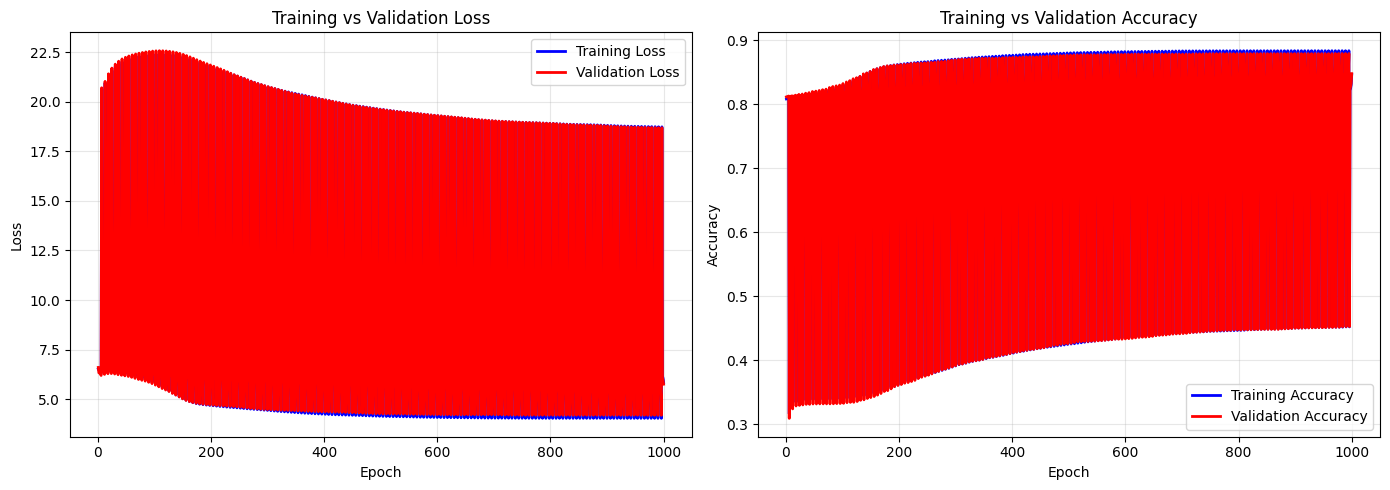

Testing trainer with params 
lr: 0.02 
epochs: 1000 
Epoch 0: Loss 5.2783, Accuracy: 43.8%
Epoch 100: Loss 6.1312, Accuracy: 83.1%
Epoch 100: Loss 6.1312, Accuracy: 83.1%
Epoch 200: Loss 6.2920, Accuracy: 82.0%
Epoch 200: Loss 6.2920, Accuracy: 82.0%
Epoch 300: Loss 4.0707, Accuracy: 43.5%
Epoch 300: Loss 4.0707, Accuracy: 43.5%
Epoch 400: Loss 5.9727, Accuracy: 83.9%
Epoch 400: Loss 5.9727, Accuracy: 83.9%
Epoch 500: Loss 6.2157, Accuracy: 82.3%
Epoch 500: Loss 6.2157, Accuracy: 82.3%
Epoch 600: Loss 4.0283, Accuracy: 45.0%
Epoch 600: Loss 4.0283, Accuracy: 45.0%
Epoch 700: Loss 5.8376, Accuracy: 84.6%
Epoch 700: Loss 5.8376, Accuracy: 84.6%
Epoch 800: Loss 6.1516, Accuracy: 82.5%
Epoch 800: Loss 6.1516, Accuracy: 82.5%
Epoch 900: Loss 4.0283, Accuracy: 46.5%
Epoch 900: Loss 4.0283, Accuracy: 46.5%

Final Test Accuracy: 82.73%
Predictions shape: (1, 6782)
Sample predictions: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

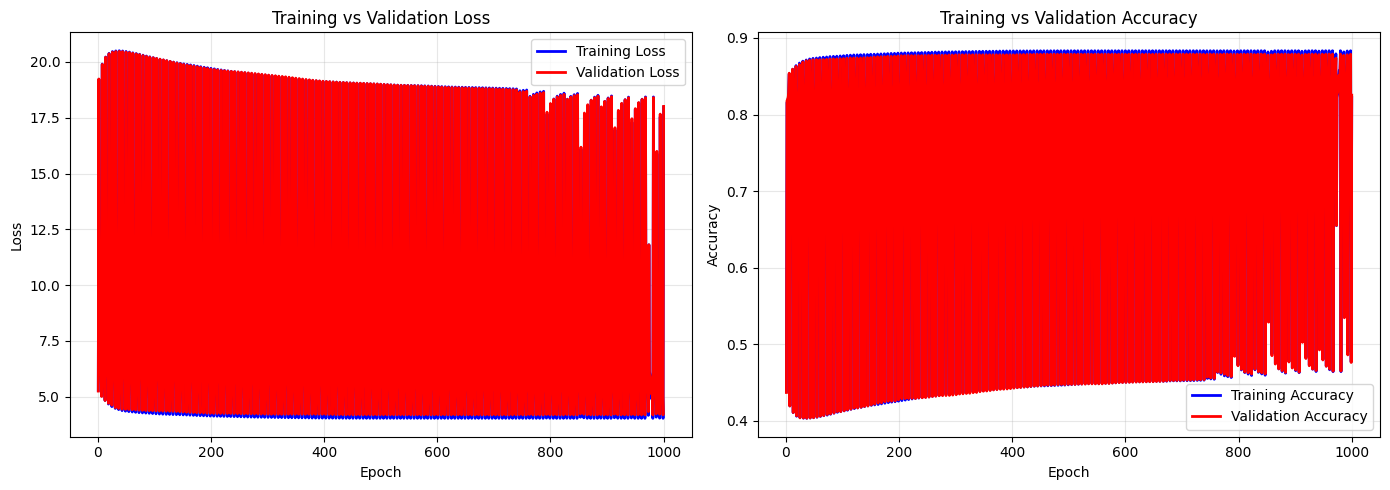

Testing trainer with params 
lr: 0.1 
epochs: 1000 
Epoch 0: Loss 6.1364, Accuracy: 45.0%
Epoch 100: Loss 6.2910, Accuracy: 82.3%
Epoch 100: Loss 6.2910, Accuracy: 82.3%
Epoch 200: Loss 6.3630, Accuracy: 81.7%
Epoch 200: Loss 6.3630, Accuracy: 81.7%
Epoch 300: Loss 4.2520, Accuracy: 41.3%
Epoch 300: Loss 4.2520, Accuracy: 41.3%
Epoch 400: Loss 6.0869, Accuracy: 83.5%
Epoch 400: Loss 6.0869, Accuracy: 83.5%
Epoch 500: Loss 6.2639, Accuracy: 82.1%
Epoch 500: Loss 6.2639, Accuracy: 82.1%
Epoch 600: Loss 4.0381, Accuracy: 44.3%
Epoch 600: Loss 4.0381, Accuracy: 44.3%
Epoch 700: Loss 5.9270, Accuracy: 84.2%
Epoch 700: Loss 5.9270, Accuracy: 84.2%
Epoch 800: Loss 6.1975, Accuracy: 82.4%
Epoch 800: Loss 6.1975, Accuracy: 82.4%
Epoch 900: Loss 4.0283, Accuracy: 45.2%
Epoch 900: Loss 4.0283, Accuracy: 45.2%

Final Test Accuracy: 83.72%
Predictions shape: (1, 6782)
Sample predictions: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

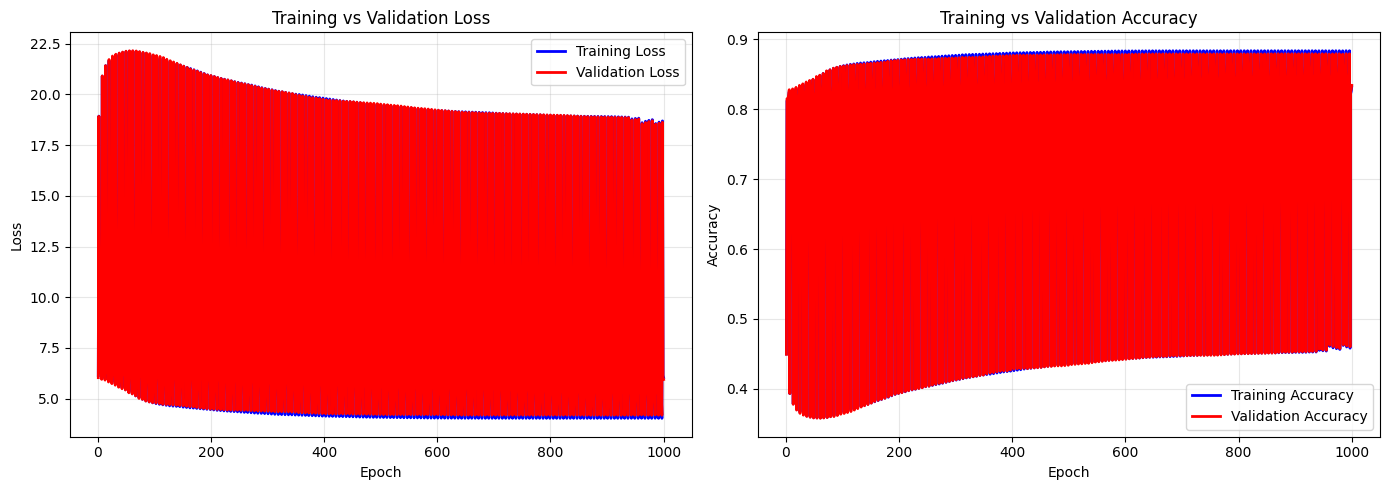

Testing trainer with params 
lr: 0.01 
epochs: 1000 
Epoch 0: Loss 6.5183, Accuracy: 80.8%


c:\Users\dorot\OneDrive\Desktop\Maciek\code\perceptron\perceptron.py:14: RuntimeWarning: overflow encountered in power
  return 1 / (1 + np.power(np.e, -Z))


Epoch 100: Loss 6.2984, Accuracy: 83.0%
Epoch 200: Loss 6.3573, Accuracy: 81.7%
Epoch 200: Loss 6.3573, Accuracy: 81.7%
Epoch 300: Loss 20.7580, Accuracy: 81.6%
Epoch 300: Loss 20.7580, Accuracy: 81.6%
Epoch 400: Loss 5.8173, Accuracy: 87.6%
Epoch 400: Loss 5.8173, Accuracy: 87.6%
Epoch 500: Loss 6.2135, Accuracy: 82.4%
Epoch 500: Loss 6.2135, Accuracy: 82.4%
Epoch 600: Loss 19.3026, Accuracy: 81.8%
Epoch 600: Loss 19.3026, Accuracy: 81.8%
Epoch 700: Loss 5.5194, Accuracy: 88.3%
Epoch 700: Loss 5.5194, Accuracy: 88.3%
Epoch 800: Loss 6.1123, Accuracy: 82.8%
Epoch 800: Loss 6.1123, Accuracy: 82.8%
Epoch 900: Loss 18.8139, Accuracy: 82.0%
Epoch 900: Loss 18.8139, Accuracy: 82.0%

Final Test Accuracy: 85.05%
Predictions shape: (1, 6782)
Sample predictions: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0

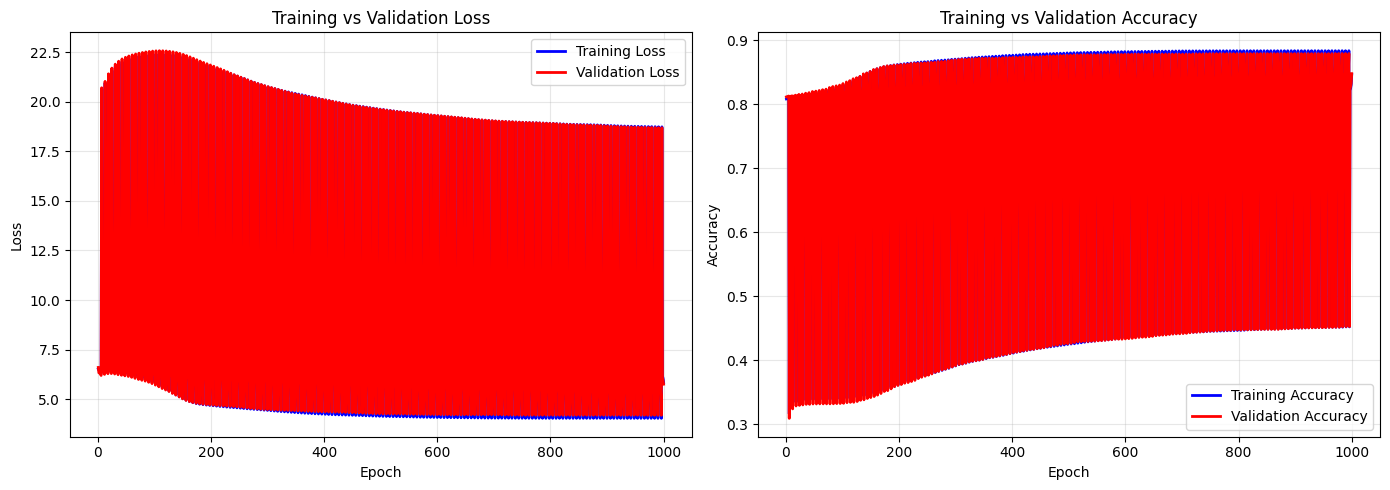

Testing trainer with params 
lr: 0.02 
epochs: 1000 
Epoch 0: Loss 5.2783, Accuracy: 43.8%
Epoch 100: Loss 6.1312, Accuracy: 83.1%
Epoch 100: Loss 6.1312, Accuracy: 83.1%
Epoch 200: Loss 6.2920, Accuracy: 82.0%
Epoch 200: Loss 6.2920, Accuracy: 82.0%
Epoch 300: Loss 4.0707, Accuracy: 43.5%
Epoch 300: Loss 4.0707, Accuracy: 43.5%
Epoch 400: Loss 5.9727, Accuracy: 83.9%
Epoch 400: Loss 5.9727, Accuracy: 83.9%
Epoch 500: Loss 6.2157, Accuracy: 82.3%
Epoch 500: Loss 6.2157, Accuracy: 82.3%
Epoch 600: Loss 4.0283, Accuracy: 45.0%
Epoch 600: Loss 4.0283, Accuracy: 45.0%
Epoch 700: Loss 5.8376, Accuracy: 84.6%
Epoch 700: Loss 5.8376, Accuracy: 84.6%
Epoch 800: Loss 6.1516, Accuracy: 82.5%
Epoch 800: Loss 6.1516, Accuracy: 82.5%
Epoch 900: Loss 4.0283, Accuracy: 46.5%
Epoch 900: Loss 4.0283, Accuracy: 46.5%

Final Test Accuracy: 82.73%
Predictions shape: (1, 6782)
Sample predictions: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

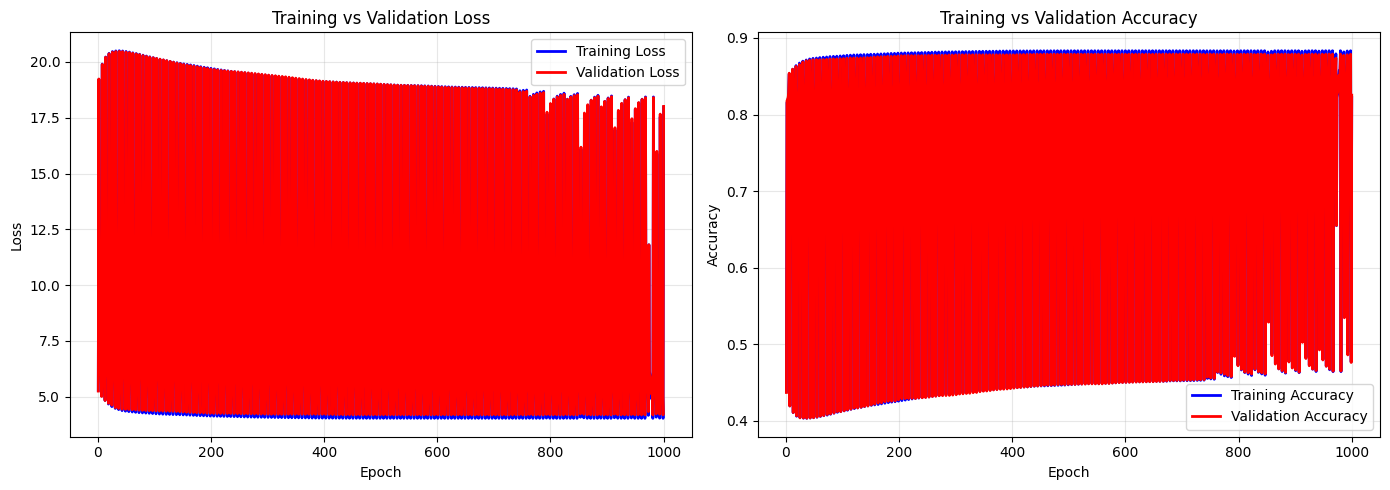

Testing trainer with params 
lr: 0.1 
epochs: 1000 
Epoch 0: Loss 6.1364, Accuracy: 45.0%
Epoch 100: Loss 6.2910, Accuracy: 82.3%
Epoch 100: Loss 6.2910, Accuracy: 82.3%
Epoch 200: Loss 6.3630, Accuracy: 81.7%
Epoch 200: Loss 6.3630, Accuracy: 81.7%
Epoch 300: Loss 4.2520, Accuracy: 41.3%
Epoch 300: Loss 4.2520, Accuracy: 41.3%
Epoch 400: Loss 6.0869, Accuracy: 83.5%
Epoch 400: Loss 6.0869, Accuracy: 83.5%
Epoch 500: Loss 6.2639, Accuracy: 82.1%
Epoch 500: Loss 6.2639, Accuracy: 82.1%
Epoch 600: Loss 4.0381, Accuracy: 44.3%
Epoch 600: Loss 4.0381, Accuracy: 44.3%
Epoch 700: Loss 5.9270, Accuracy: 84.2%
Epoch 700: Loss 5.9270, Accuracy: 84.2%
Epoch 800: Loss 6.1975, Accuracy: 82.4%
Epoch 800: Loss 6.1975, Accuracy: 82.4%
Epoch 900: Loss 4.0283, Accuracy: 45.2%
Epoch 900: Loss 4.0283, Accuracy: 45.2%

Final Test Accuracy: 83.72%
Predictions shape: (1, 6782)
Sample predictions: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

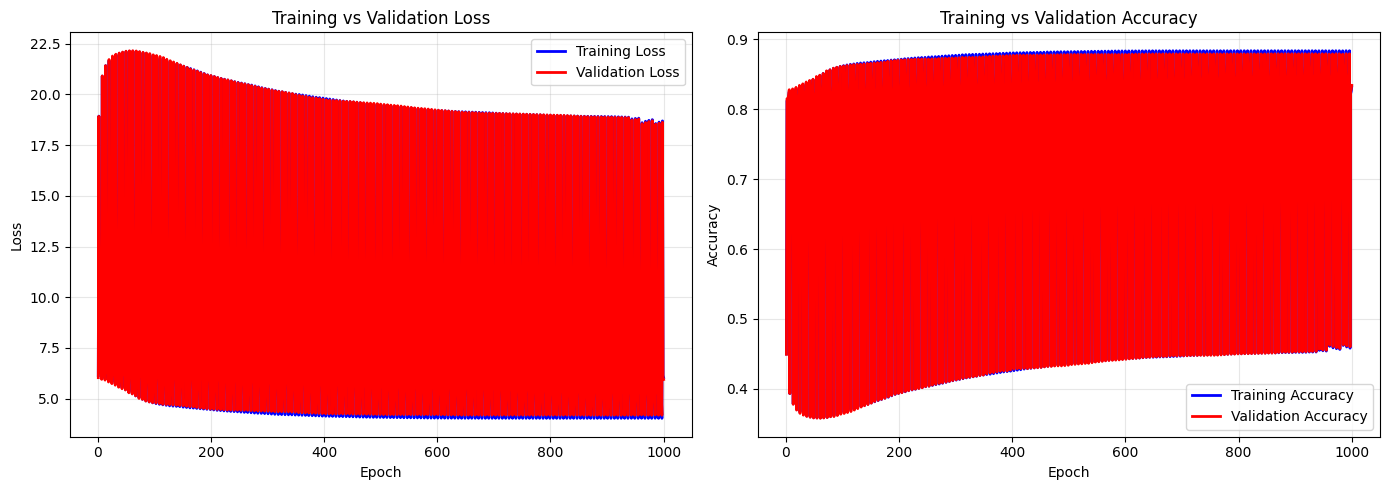

Testing trainer with params 
lr: 0.01 
epochs: 10000 
Epoch 0: Loss 5.8125, Accuracy: 83.3%
Epoch 100: Loss 6.7383, Accuracy: 88.2%
Epoch 100: Loss 6.7383, Accuracy: 88.2%
Epoch 200: Loss 7.1994, Accuracy: 88.2%
Epoch 200: Loss 7.1994, Accuracy: 88.2%
Epoch 300: Loss 6.5964, Accuracy: 88.2%
Epoch 300: Loss 6.5964, Accuracy: 88.2%
Epoch 400: Loss 7.3170, Accuracy: 88.1%
Epoch 400: Loss 7.3170, Accuracy: 88.1%
Epoch 500: Loss 4.1129, Accuracy: 88.3%
Epoch 500: Loss 4.1129, Accuracy: 88.3%
Epoch 600: Loss 4.0326, Accuracy: 88.3%
Epoch 600: Loss 4.0326, Accuracy: 88.3%
Epoch 700: Loss 6.2306, Accuracy: 88.2%
Epoch 700: Loss 6.2306, Accuracy: 88.2%
Epoch 800: Loss 4.0283, Accuracy: 77.9%
Epoch 800: Loss 4.0283, Accuracy: 77.9%
Epoch 900: Loss 7.8073, Accuracy: 87.9%
Epoch 900: Loss 7.8073, Accuracy: 87.9%
Epoch 1000: Loss 4.0283, Accuracy: 78.2%
Epoch 1000: Loss 4.0283, Accuracy: 78.2%
Epoch 1100: Loss 4.1998, Accuracy: 88.2%
Epoch 1100: Loss 4.1998, Accuracy: 88.2%
Epoch 1200: Loss 4.0283,

Testing trainer with params 
lr: 0.01 
epochs: 1000 
Epoch 0: Loss 6.5183, Accuracy: 80.8%


c:\Users\dorot\OneDrive\Desktop\Maciek\code\perceptron\perceptron.py:14: RuntimeWarning: overflow encountered in power
  return 1 / (1 + np.power(np.e, -Z))


Epoch 100: Loss 6.2984, Accuracy: 83.0%
Epoch 200: Loss 6.3573, Accuracy: 81.7%
Epoch 200: Loss 6.3573, Accuracy: 81.7%
Epoch 300: Loss 20.7580, Accuracy: 81.6%
Epoch 300: Loss 20.7580, Accuracy: 81.6%
Epoch 400: Loss 5.8173, Accuracy: 87.6%
Epoch 400: Loss 5.8173, Accuracy: 87.6%
Epoch 500: Loss 6.2135, Accuracy: 82.4%
Epoch 500: Loss 6.2135, Accuracy: 82.4%
Epoch 600: Loss 19.3026, Accuracy: 81.8%
Epoch 600: Loss 19.3026, Accuracy: 81.8%
Epoch 700: Loss 5.5194, Accuracy: 88.3%
Epoch 700: Loss 5.5194, Accuracy: 88.3%
Epoch 800: Loss 6.1123, Accuracy: 82.8%
Epoch 800: Loss 6.1123, Accuracy: 82.8%
Epoch 900: Loss 18.8139, Accuracy: 82.0%
Epoch 900: Loss 18.8139, Accuracy: 82.0%

Final Test Accuracy: 85.05%
Predictions shape: (1, 6782)
Sample predictions: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0

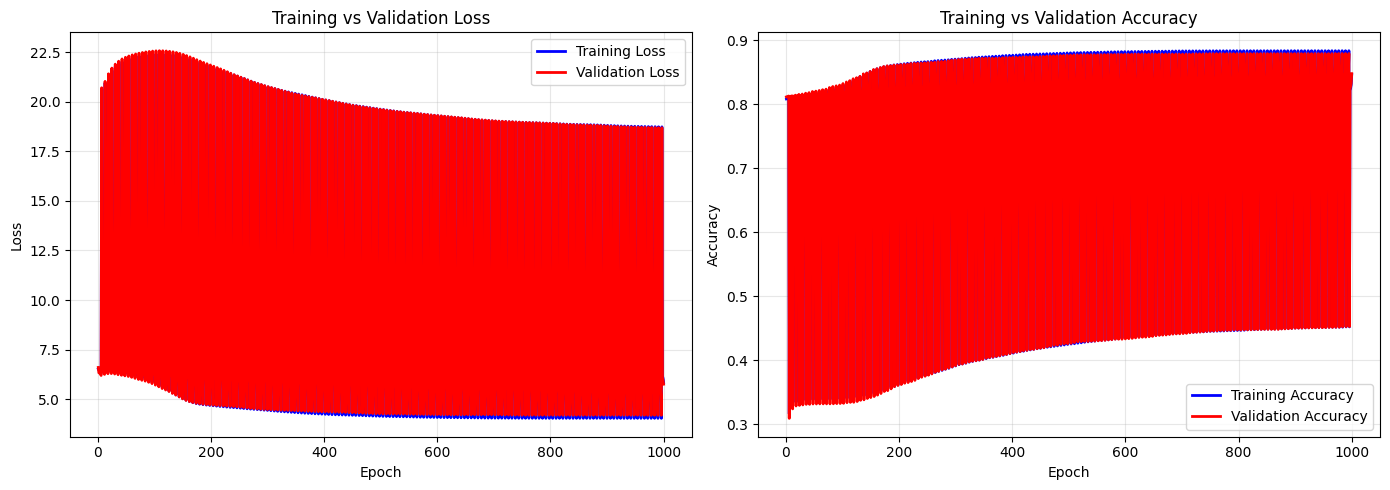

Testing trainer with params 
lr: 0.02 
epochs: 1000 
Epoch 0: Loss 5.2783, Accuracy: 43.8%
Epoch 100: Loss 6.1312, Accuracy: 83.1%
Epoch 100: Loss 6.1312, Accuracy: 83.1%
Epoch 200: Loss 6.2920, Accuracy: 82.0%
Epoch 200: Loss 6.2920, Accuracy: 82.0%
Epoch 300: Loss 4.0707, Accuracy: 43.5%
Epoch 300: Loss 4.0707, Accuracy: 43.5%
Epoch 400: Loss 5.9727, Accuracy: 83.9%
Epoch 400: Loss 5.9727, Accuracy: 83.9%
Epoch 500: Loss 6.2157, Accuracy: 82.3%
Epoch 500: Loss 6.2157, Accuracy: 82.3%
Epoch 600: Loss 4.0283, Accuracy: 45.0%
Epoch 600: Loss 4.0283, Accuracy: 45.0%
Epoch 700: Loss 5.8376, Accuracy: 84.6%
Epoch 700: Loss 5.8376, Accuracy: 84.6%
Epoch 800: Loss 6.1516, Accuracy: 82.5%
Epoch 800: Loss 6.1516, Accuracy: 82.5%
Epoch 900: Loss 4.0283, Accuracy: 46.5%
Epoch 900: Loss 4.0283, Accuracy: 46.5%

Final Test Accuracy: 82.73%
Predictions shape: (1, 6782)
Sample predictions: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

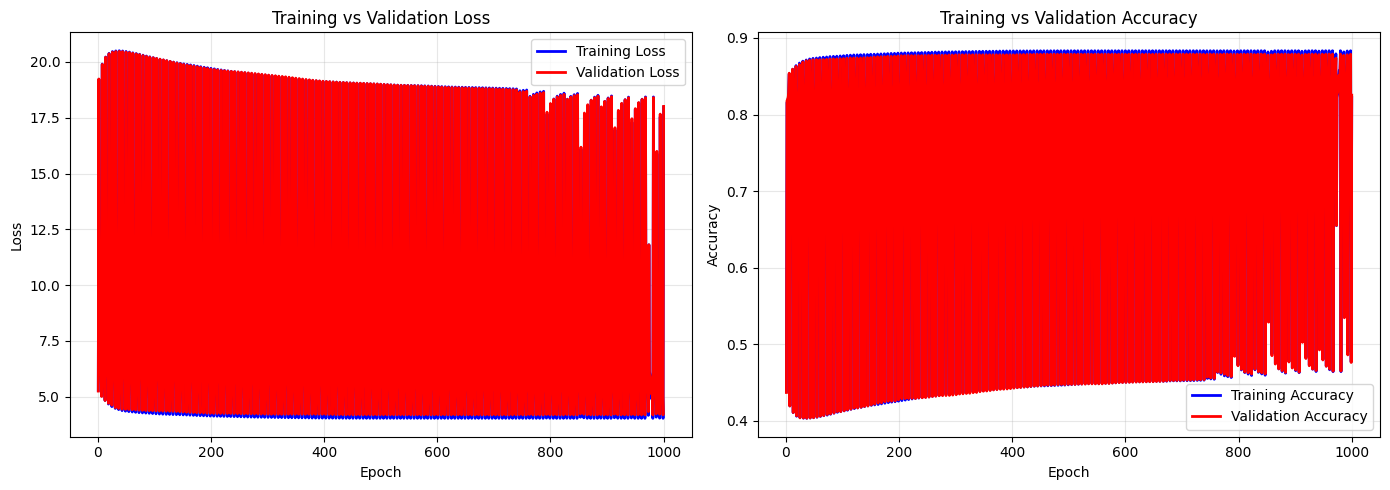

Testing trainer with params 
lr: 0.1 
epochs: 1000 
Epoch 0: Loss 6.1364, Accuracy: 45.0%
Epoch 100: Loss 6.2910, Accuracy: 82.3%
Epoch 100: Loss 6.2910, Accuracy: 82.3%
Epoch 200: Loss 6.3630, Accuracy: 81.7%
Epoch 200: Loss 6.3630, Accuracy: 81.7%
Epoch 300: Loss 4.2520, Accuracy: 41.3%
Epoch 300: Loss 4.2520, Accuracy: 41.3%
Epoch 400: Loss 6.0869, Accuracy: 83.5%
Epoch 400: Loss 6.0869, Accuracy: 83.5%
Epoch 500: Loss 6.2639, Accuracy: 82.1%
Epoch 500: Loss 6.2639, Accuracy: 82.1%
Epoch 600: Loss 4.0381, Accuracy: 44.3%
Epoch 600: Loss 4.0381, Accuracy: 44.3%
Epoch 700: Loss 5.9270, Accuracy: 84.2%
Epoch 700: Loss 5.9270, Accuracy: 84.2%
Epoch 800: Loss 6.1975, Accuracy: 82.4%
Epoch 800: Loss 6.1975, Accuracy: 82.4%
Epoch 900: Loss 4.0283, Accuracy: 45.2%
Epoch 900: Loss 4.0283, Accuracy: 45.2%

Final Test Accuracy: 83.72%
Predictions shape: (1, 6782)
Sample predictions: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

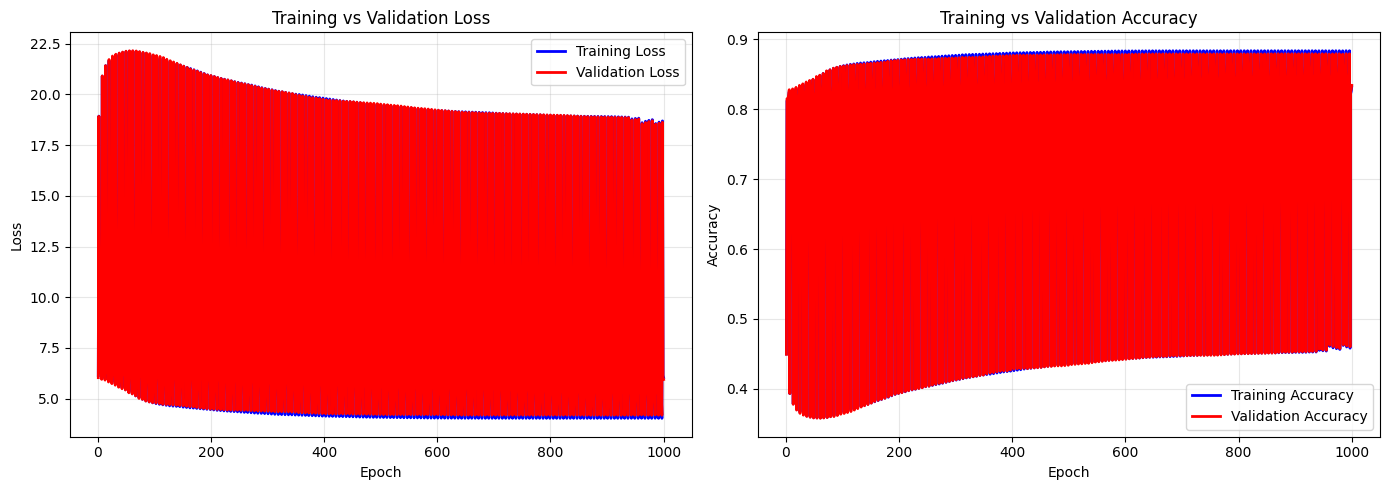

Testing trainer with params 
lr: 0.01 
epochs: 10000 
Epoch 0: Loss 5.8125, Accuracy: 83.3%
Epoch 100: Loss 6.7383, Accuracy: 88.2%
Epoch 100: Loss 6.7383, Accuracy: 88.2%
Epoch 200: Loss 7.1994, Accuracy: 88.2%
Epoch 200: Loss 7.1994, Accuracy: 88.2%
Epoch 300: Loss 6.5964, Accuracy: 88.2%
Epoch 300: Loss 6.5964, Accuracy: 88.2%
Epoch 400: Loss 7.3170, Accuracy: 88.1%
Epoch 400: Loss 7.3170, Accuracy: 88.1%
Epoch 500: Loss 4.1129, Accuracy: 88.3%
Epoch 500: Loss 4.1129, Accuracy: 88.3%
Epoch 600: Loss 4.0326, Accuracy: 88.3%
Epoch 600: Loss 4.0326, Accuracy: 88.3%
Epoch 700: Loss 6.2306, Accuracy: 88.2%
Epoch 700: Loss 6.2306, Accuracy: 88.2%
Epoch 800: Loss 4.0283, Accuracy: 77.9%
Epoch 800: Loss 4.0283, Accuracy: 77.9%
Epoch 900: Loss 7.8073, Accuracy: 87.9%
Epoch 900: Loss 7.8073, Accuracy: 87.9%
Epoch 1000: Loss 4.0283, Accuracy: 78.2%
Epoch 1000: Loss 4.0283, Accuracy: 78.2%
Epoch 1100: Loss 4.1998, Accuracy: 88.2%
Epoch 1100: Loss 4.1998, Accuracy: 88.2%
Epoch 1200: Loss 4.0283,

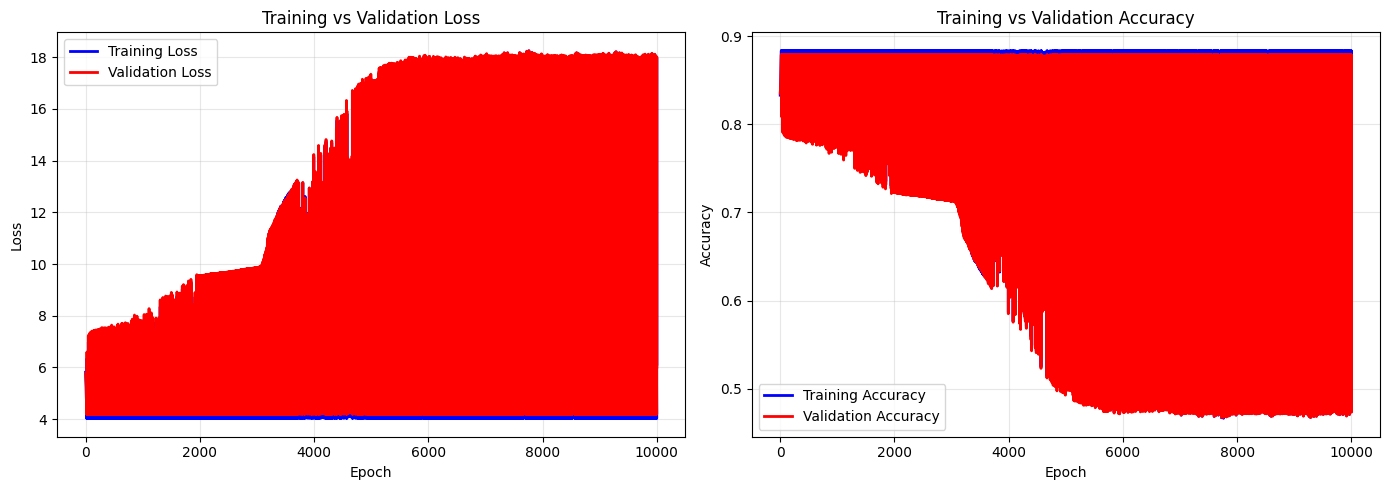

Testing trainer with params 
lr: 0.01 
epochs: 1000 
Epoch 0: Loss 6.5183, Accuracy: 80.8%


c:\Users\dorot\OneDrive\Desktop\Maciek\code\perceptron\perceptron.py:14: RuntimeWarning: overflow encountered in power
  return 1 / (1 + np.power(np.e, -Z))


Epoch 100: Loss 6.2984, Accuracy: 83.0%
Epoch 200: Loss 6.3573, Accuracy: 81.7%
Epoch 200: Loss 6.3573, Accuracy: 81.7%
Epoch 300: Loss 20.7580, Accuracy: 81.6%
Epoch 300: Loss 20.7580, Accuracy: 81.6%
Epoch 400: Loss 5.8173, Accuracy: 87.6%
Epoch 400: Loss 5.8173, Accuracy: 87.6%
Epoch 500: Loss 6.2135, Accuracy: 82.4%
Epoch 500: Loss 6.2135, Accuracy: 82.4%
Epoch 600: Loss 19.3026, Accuracy: 81.8%
Epoch 600: Loss 19.3026, Accuracy: 81.8%
Epoch 700: Loss 5.5194, Accuracy: 88.3%
Epoch 700: Loss 5.5194, Accuracy: 88.3%
Epoch 800: Loss 6.1123, Accuracy: 82.8%
Epoch 800: Loss 6.1123, Accuracy: 82.8%
Epoch 900: Loss 18.8139, Accuracy: 82.0%
Epoch 900: Loss 18.8139, Accuracy: 82.0%

Final Test Accuracy: 85.05%
Predictions shape: (1, 6782)
Sample predictions: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0

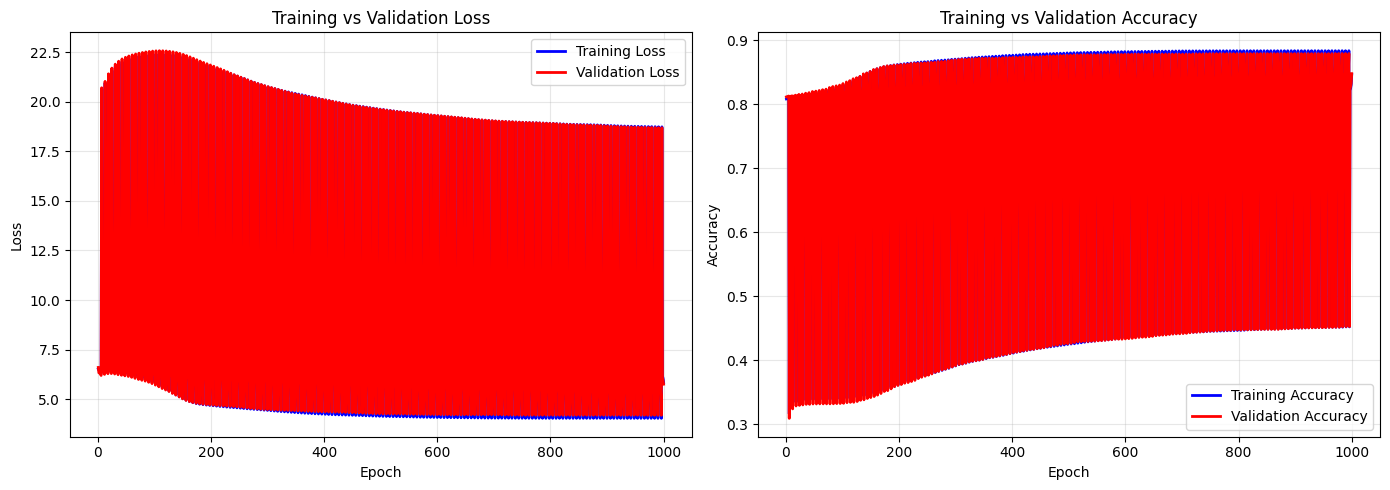

Testing trainer with params 
lr: 0.02 
epochs: 1000 
Epoch 0: Loss 5.2783, Accuracy: 43.8%
Epoch 100: Loss 6.1312, Accuracy: 83.1%
Epoch 100: Loss 6.1312, Accuracy: 83.1%
Epoch 200: Loss 6.2920, Accuracy: 82.0%
Epoch 200: Loss 6.2920, Accuracy: 82.0%
Epoch 300: Loss 4.0707, Accuracy: 43.5%
Epoch 300: Loss 4.0707, Accuracy: 43.5%
Epoch 400: Loss 5.9727, Accuracy: 83.9%
Epoch 400: Loss 5.9727, Accuracy: 83.9%
Epoch 500: Loss 6.2157, Accuracy: 82.3%
Epoch 500: Loss 6.2157, Accuracy: 82.3%
Epoch 600: Loss 4.0283, Accuracy: 45.0%
Epoch 600: Loss 4.0283, Accuracy: 45.0%
Epoch 700: Loss 5.8376, Accuracy: 84.6%
Epoch 700: Loss 5.8376, Accuracy: 84.6%
Epoch 800: Loss 6.1516, Accuracy: 82.5%
Epoch 800: Loss 6.1516, Accuracy: 82.5%
Epoch 900: Loss 4.0283, Accuracy: 46.5%
Epoch 900: Loss 4.0283, Accuracy: 46.5%

Final Test Accuracy: 82.73%
Predictions shape: (1, 6782)
Sample predictions: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

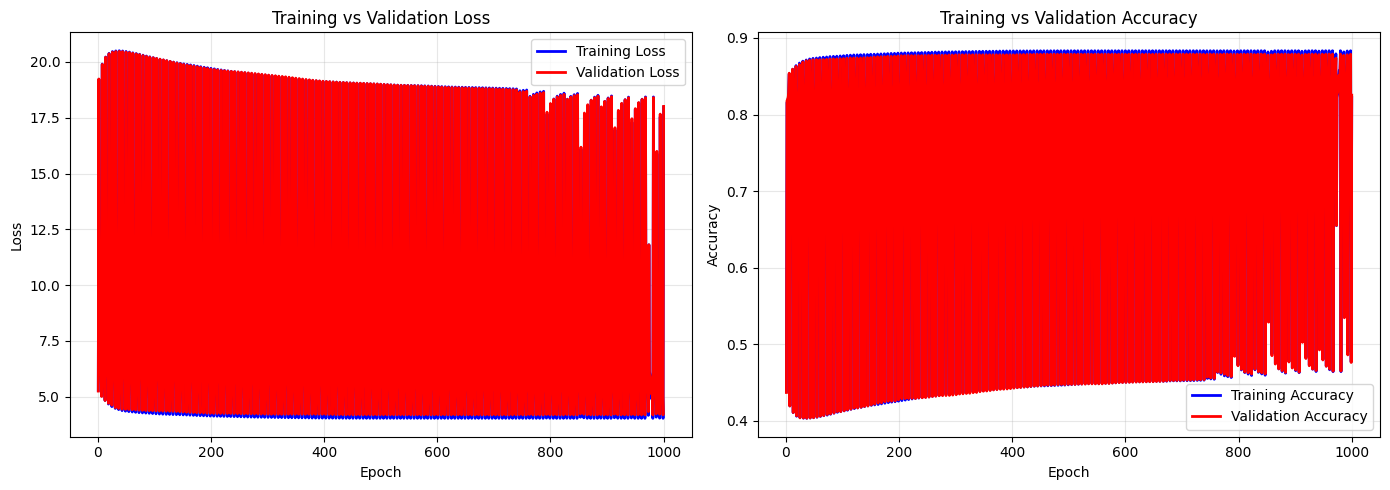

Testing trainer with params 
lr: 0.1 
epochs: 1000 
Epoch 0: Loss 6.1364, Accuracy: 45.0%
Epoch 100: Loss 6.2910, Accuracy: 82.3%
Epoch 100: Loss 6.2910, Accuracy: 82.3%
Epoch 200: Loss 6.3630, Accuracy: 81.7%
Epoch 200: Loss 6.3630, Accuracy: 81.7%
Epoch 300: Loss 4.2520, Accuracy: 41.3%
Epoch 300: Loss 4.2520, Accuracy: 41.3%
Epoch 400: Loss 6.0869, Accuracy: 83.5%
Epoch 400: Loss 6.0869, Accuracy: 83.5%
Epoch 500: Loss 6.2639, Accuracy: 82.1%
Epoch 500: Loss 6.2639, Accuracy: 82.1%
Epoch 600: Loss 4.0381, Accuracy: 44.3%
Epoch 600: Loss 4.0381, Accuracy: 44.3%
Epoch 700: Loss 5.9270, Accuracy: 84.2%
Epoch 700: Loss 5.9270, Accuracy: 84.2%
Epoch 800: Loss 6.1975, Accuracy: 82.4%
Epoch 800: Loss 6.1975, Accuracy: 82.4%
Epoch 900: Loss 4.0283, Accuracy: 45.2%
Epoch 900: Loss 4.0283, Accuracy: 45.2%

Final Test Accuracy: 83.72%
Predictions shape: (1, 6782)
Sample predictions: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

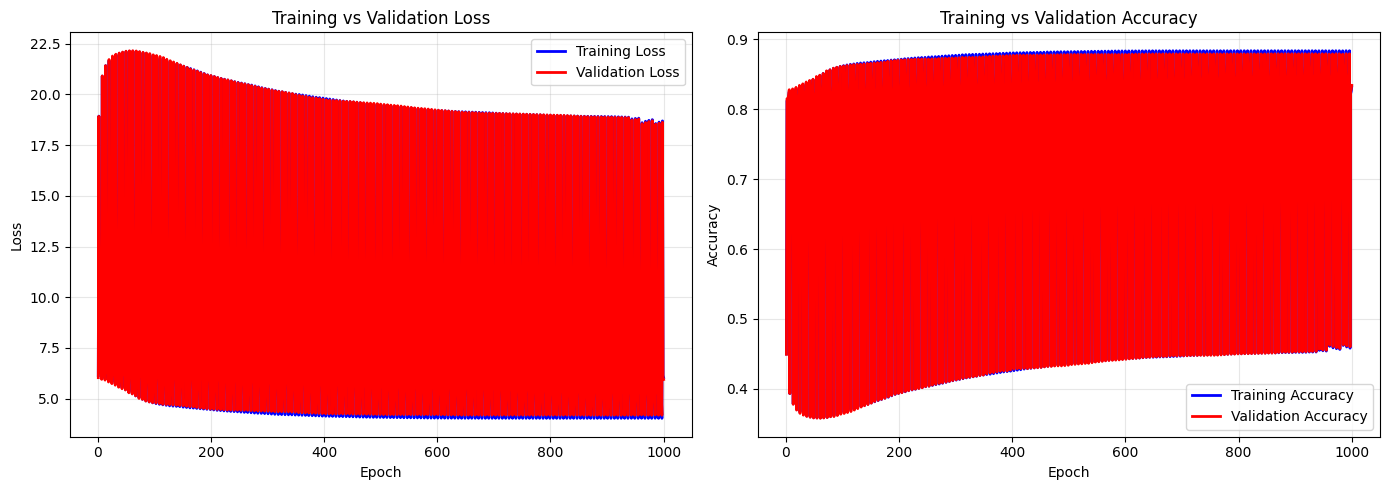

Testing trainer with params 
lr: 0.01 
epochs: 10000 
Epoch 0: Loss 5.8125, Accuracy: 83.3%
Epoch 100: Loss 6.7383, Accuracy: 88.2%
Epoch 100: Loss 6.7383, Accuracy: 88.2%
Epoch 200: Loss 7.1994, Accuracy: 88.2%
Epoch 200: Loss 7.1994, Accuracy: 88.2%
Epoch 300: Loss 6.5964, Accuracy: 88.2%
Epoch 300: Loss 6.5964, Accuracy: 88.2%
Epoch 400: Loss 7.3170, Accuracy: 88.1%
Epoch 400: Loss 7.3170, Accuracy: 88.1%
Epoch 500: Loss 4.1129, Accuracy: 88.3%
Epoch 500: Loss 4.1129, Accuracy: 88.3%
Epoch 600: Loss 4.0326, Accuracy: 88.3%
Epoch 600: Loss 4.0326, Accuracy: 88.3%
Epoch 700: Loss 6.2306, Accuracy: 88.2%
Epoch 700: Loss 6.2306, Accuracy: 88.2%
Epoch 800: Loss 4.0283, Accuracy: 77.9%
Epoch 800: Loss 4.0283, Accuracy: 77.9%
Epoch 900: Loss 7.8073, Accuracy: 87.9%
Epoch 900: Loss 7.8073, Accuracy: 87.9%
Epoch 1000: Loss 4.0283, Accuracy: 78.2%
Epoch 1000: Loss 4.0283, Accuracy: 78.2%
Epoch 1100: Loss 4.1998, Accuracy: 88.2%
Epoch 1100: Loss 4.1998, Accuracy: 88.2%
Epoch 1200: Loss 4.0283,

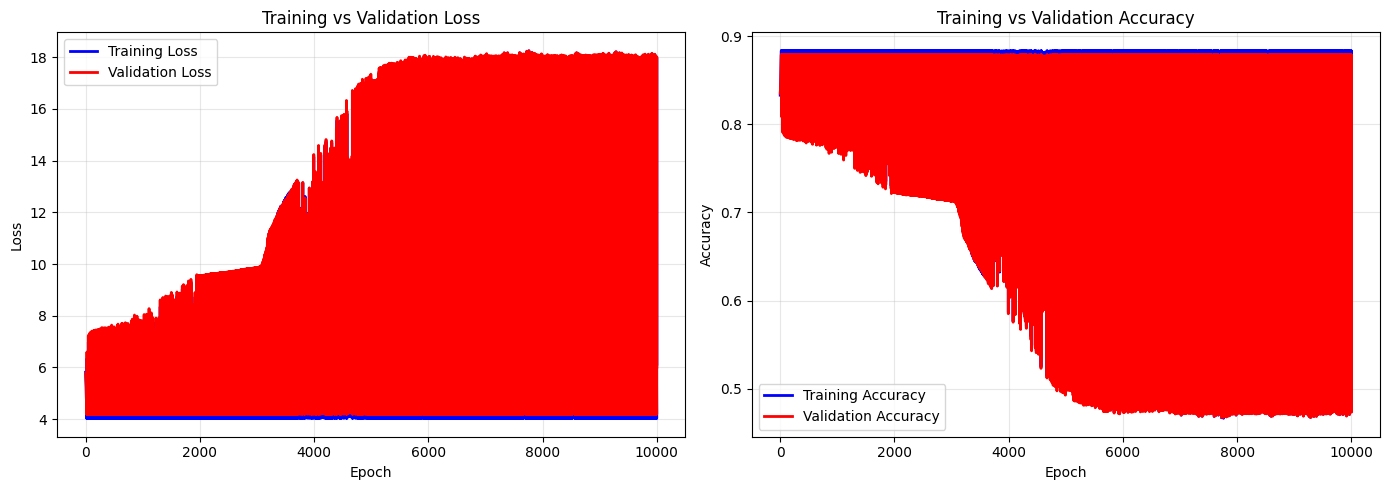

Testing trainer with params 
lr: 0.001 
epochs: 1000 
Epoch 0: Loss 5.9841, Accuracy: 82.7%
Epoch 100: Loss 4.0778, Accuracy: 82.9%
Epoch 100: Loss 4.0778, Accuracy: 82.9%
Epoch 200: Loss 6.7762, Accuracy: 88.2%
Epoch 200: Loss 6.7762, Accuracy: 88.2%
Epoch 300: Loss 6.8607, Accuracy: 88.2%
Epoch 300: Loss 6.8607, Accuracy: 88.2%
Epoch 400: Loss 6.6497, Accuracy: 88.2%
Epoch 400: Loss 6.6497, Accuracy: 88.2%
Epoch 500: Loss 6.9959, Accuracy: 88.2%
Epoch 500: Loss 6.9959, Accuracy: 88.2%
Epoch 600: Loss 6.8797, Accuracy: 88.2%
Epoch 600: Loss 6.8797, Accuracy: 88.2%
Epoch 700: Loss 6.4818, Accuracy: 88.2%
Epoch 700: Loss 6.4818, Accuracy: 88.2%
Epoch 800: Loss 7.1422, Accuracy: 88.1%
Epoch 800: Loss 7.1422, Accuracy: 88.1%
Epoch 900: Loss 4.0754, Accuracy: 88.3%
Epoch 900: Loss 4.0754, Accuracy: 88.3%

Final Test Accuracy: 88.41%
Predictions shape: (1, 6782)
Sample predictions: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

Testing trainer with params 
lr: 0.01 
epochs: 1000 
Epoch 0: Loss 6.5183, Accuracy: 80.8%


c:\Users\dorot\OneDrive\Desktop\Maciek\code\perceptron\perceptron.py:14: RuntimeWarning: overflow encountered in power
  return 1 / (1 + np.power(np.e, -Z))


Epoch 100: Loss 6.2984, Accuracy: 83.0%
Epoch 200: Loss 6.3573, Accuracy: 81.7%
Epoch 200: Loss 6.3573, Accuracy: 81.7%
Epoch 300: Loss 20.7580, Accuracy: 81.6%
Epoch 300: Loss 20.7580, Accuracy: 81.6%
Epoch 400: Loss 5.8173, Accuracy: 87.6%
Epoch 400: Loss 5.8173, Accuracy: 87.6%
Epoch 500: Loss 6.2135, Accuracy: 82.4%
Epoch 500: Loss 6.2135, Accuracy: 82.4%
Epoch 600: Loss 19.3026, Accuracy: 81.8%
Epoch 600: Loss 19.3026, Accuracy: 81.8%
Epoch 700: Loss 5.5194, Accuracy: 88.3%
Epoch 700: Loss 5.5194, Accuracy: 88.3%
Epoch 800: Loss 6.1123, Accuracy: 82.8%
Epoch 800: Loss 6.1123, Accuracy: 82.8%
Epoch 900: Loss 18.8139, Accuracy: 82.0%
Epoch 900: Loss 18.8139, Accuracy: 82.0%

Final Test Accuracy: 85.05%
Predictions shape: (1, 6782)
Sample predictions: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0

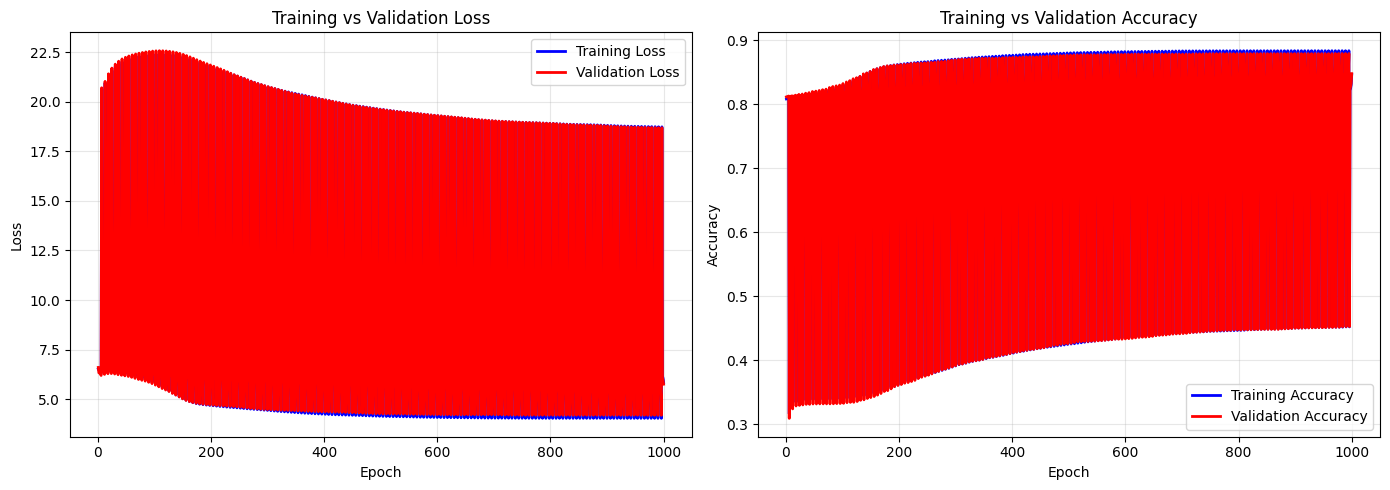

Testing trainer with params 
lr: 0.02 
epochs: 1000 
Epoch 0: Loss 5.2783, Accuracy: 43.8%
Epoch 100: Loss 6.1312, Accuracy: 83.1%
Epoch 100: Loss 6.1312, Accuracy: 83.1%
Epoch 200: Loss 6.2920, Accuracy: 82.0%
Epoch 200: Loss 6.2920, Accuracy: 82.0%
Epoch 300: Loss 4.0707, Accuracy: 43.5%
Epoch 300: Loss 4.0707, Accuracy: 43.5%
Epoch 400: Loss 5.9727, Accuracy: 83.9%
Epoch 400: Loss 5.9727, Accuracy: 83.9%
Epoch 500: Loss 6.2157, Accuracy: 82.3%
Epoch 500: Loss 6.2157, Accuracy: 82.3%
Epoch 600: Loss 4.0283, Accuracy: 45.0%
Epoch 600: Loss 4.0283, Accuracy: 45.0%
Epoch 700: Loss 5.8376, Accuracy: 84.6%
Epoch 700: Loss 5.8376, Accuracy: 84.6%
Epoch 800: Loss 6.1516, Accuracy: 82.5%
Epoch 800: Loss 6.1516, Accuracy: 82.5%
Epoch 900: Loss 4.0283, Accuracy: 46.5%
Epoch 900: Loss 4.0283, Accuracy: 46.5%

Final Test Accuracy: 82.73%
Predictions shape: (1, 6782)
Sample predictions: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

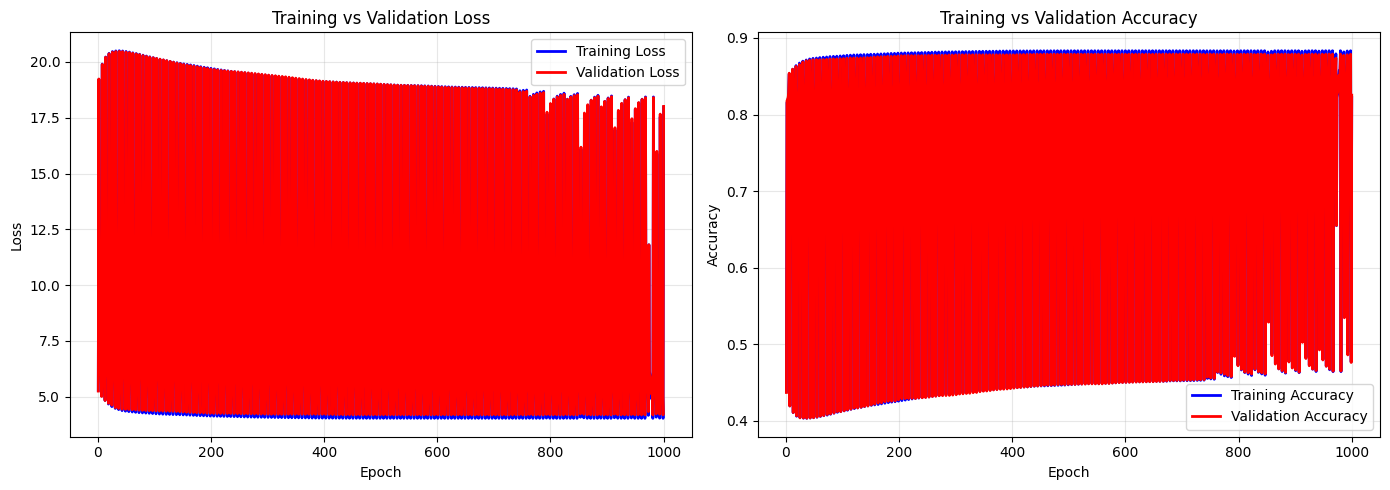

Testing trainer with params 
lr: 0.1 
epochs: 1000 
Epoch 0: Loss 6.1364, Accuracy: 45.0%
Epoch 100: Loss 6.2910, Accuracy: 82.3%
Epoch 100: Loss 6.2910, Accuracy: 82.3%
Epoch 200: Loss 6.3630, Accuracy: 81.7%
Epoch 200: Loss 6.3630, Accuracy: 81.7%
Epoch 300: Loss 4.2520, Accuracy: 41.3%
Epoch 300: Loss 4.2520, Accuracy: 41.3%
Epoch 400: Loss 6.0869, Accuracy: 83.5%
Epoch 400: Loss 6.0869, Accuracy: 83.5%
Epoch 500: Loss 6.2639, Accuracy: 82.1%
Epoch 500: Loss 6.2639, Accuracy: 82.1%
Epoch 600: Loss 4.0381, Accuracy: 44.3%
Epoch 600: Loss 4.0381, Accuracy: 44.3%
Epoch 700: Loss 5.9270, Accuracy: 84.2%
Epoch 700: Loss 5.9270, Accuracy: 84.2%
Epoch 800: Loss 6.1975, Accuracy: 82.4%
Epoch 800: Loss 6.1975, Accuracy: 82.4%
Epoch 900: Loss 4.0283, Accuracy: 45.2%
Epoch 900: Loss 4.0283, Accuracy: 45.2%

Final Test Accuracy: 83.72%
Predictions shape: (1, 6782)
Sample predictions: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

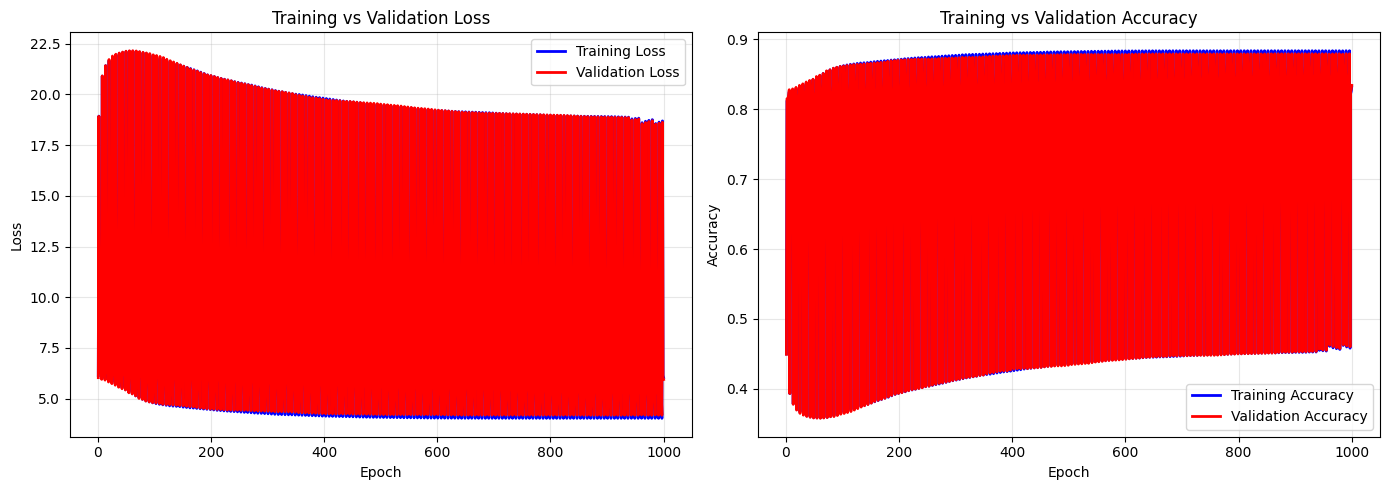

Testing trainer with params 
lr: 0.01 
epochs: 10000 
Epoch 0: Loss 5.8125, Accuracy: 83.3%
Epoch 100: Loss 6.7383, Accuracy: 88.2%
Epoch 100: Loss 6.7383, Accuracy: 88.2%
Epoch 200: Loss 7.1994, Accuracy: 88.2%
Epoch 200: Loss 7.1994, Accuracy: 88.2%
Epoch 300: Loss 6.5964, Accuracy: 88.2%
Epoch 300: Loss 6.5964, Accuracy: 88.2%
Epoch 400: Loss 7.3170, Accuracy: 88.1%
Epoch 400: Loss 7.3170, Accuracy: 88.1%
Epoch 500: Loss 4.1129, Accuracy: 88.3%
Epoch 500: Loss 4.1129, Accuracy: 88.3%
Epoch 600: Loss 4.0326, Accuracy: 88.3%
Epoch 600: Loss 4.0326, Accuracy: 88.3%
Epoch 700: Loss 6.2306, Accuracy: 88.2%
Epoch 700: Loss 6.2306, Accuracy: 88.2%
Epoch 800: Loss 4.0283, Accuracy: 77.9%
Epoch 800: Loss 4.0283, Accuracy: 77.9%
Epoch 900: Loss 7.8073, Accuracy: 87.9%
Epoch 900: Loss 7.8073, Accuracy: 87.9%
Epoch 1000: Loss 4.0283, Accuracy: 78.2%
Epoch 1000: Loss 4.0283, Accuracy: 78.2%
Epoch 1100: Loss 4.1998, Accuracy: 88.2%
Epoch 1100: Loss 4.1998, Accuracy: 88.2%
Epoch 1200: Loss 4.0283,

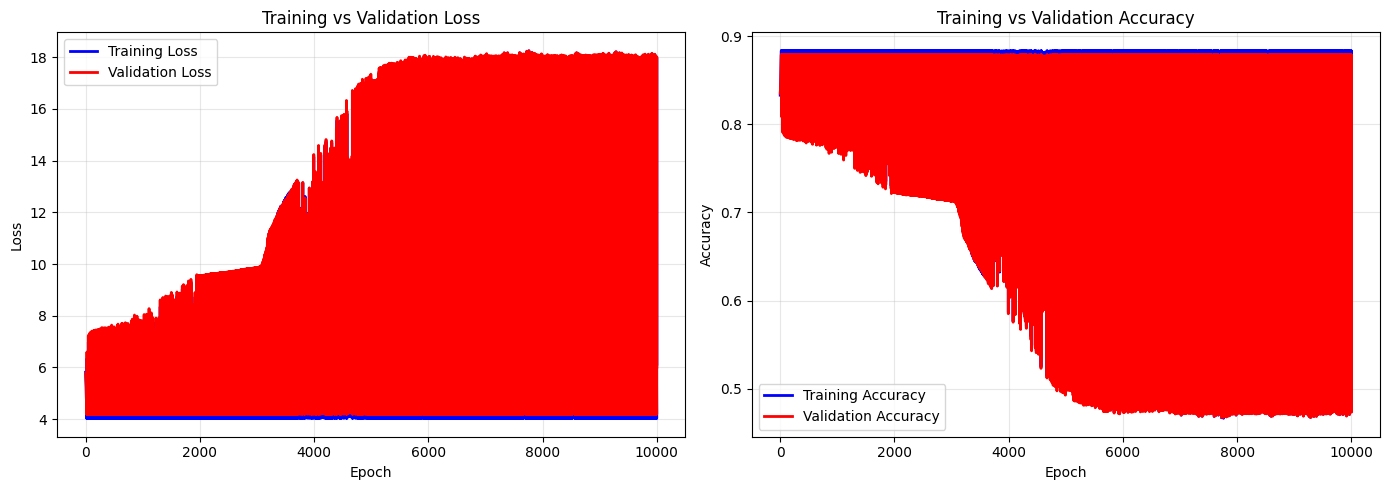

Testing trainer with params 
lr: 0.001 
epochs: 1000 
Epoch 0: Loss 5.9841, Accuracy: 82.7%
Epoch 100: Loss 4.0778, Accuracy: 82.9%
Epoch 100: Loss 4.0778, Accuracy: 82.9%
Epoch 200: Loss 6.7762, Accuracy: 88.2%
Epoch 200: Loss 6.7762, Accuracy: 88.2%
Epoch 300: Loss 6.8607, Accuracy: 88.2%
Epoch 300: Loss 6.8607, Accuracy: 88.2%
Epoch 400: Loss 6.6497, Accuracy: 88.2%
Epoch 400: Loss 6.6497, Accuracy: 88.2%
Epoch 500: Loss 6.9959, Accuracy: 88.2%
Epoch 500: Loss 6.9959, Accuracy: 88.2%
Epoch 600: Loss 6.8797, Accuracy: 88.2%
Epoch 600: Loss 6.8797, Accuracy: 88.2%
Epoch 700: Loss 6.4818, Accuracy: 88.2%
Epoch 700: Loss 6.4818, Accuracy: 88.2%
Epoch 800: Loss 7.1422, Accuracy: 88.1%
Epoch 800: Loss 7.1422, Accuracy: 88.1%
Epoch 900: Loss 4.0754, Accuracy: 88.3%
Epoch 900: Loss 4.0754, Accuracy: 88.3%

Final Test Accuracy: 88.41%
Predictions shape: (1, 6782)
Sample predictions: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

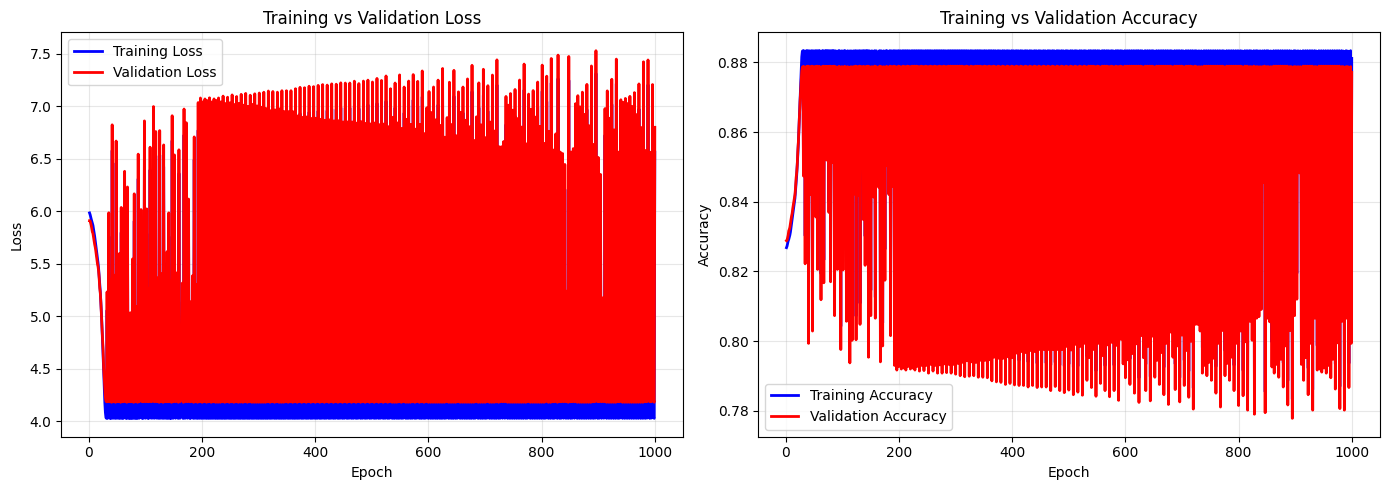

In [13]:
from util import test_trainers

trainers = [trainer, trainer1, trainer2, trainer3, trainer4]

test_trainers(trainers=trainers, x_train=x_train_t, y_train=y_train, x_val=x_val_t, y_val=y_val, x_test=x_test_t, y_test=y_test)

### Perceptron in Torch

Epoch 0: Train Loss = 80.9136, Train Acc = 0.1803
Epoch 100: Train Loss = 80.5711, Train Acc = 0.1813
Epoch 100: Train Loss = 80.5711, Train Acc = 0.1813
Epoch 200: Train Loss = 79.9288, Train Acc = 0.1820
Epoch 200: Train Loss = 79.9288, Train Acc = 0.1820
Epoch 300: Train Loss = 76.7772, Train Acc = 0.1836
Epoch 300: Train Loss = 76.7772, Train Acc = 0.1836
Epoch 400: Train Loss = 69.7535, Train Acc = 0.1899
Epoch 400: Train Loss = 69.7535, Train Acc = 0.1899
Epoch 500: Train Loss = 67.0316, Train Acc = 0.2816
Epoch 500: Train Loss = 67.0316, Train Acc = 0.2816
Epoch 600: Train Loss = 49.5843, Train Acc = 0.3740
Epoch 600: Train Loss = 49.5843, Train Acc = 0.3740
Epoch 700: Train Loss = 8.8901, Train Acc = 0.8407
Epoch 700: Train Loss = 8.8901, Train Acc = 0.8407
Epoch 800: Train Loss = 8.6408, Train Acc = 0.8435
Epoch 800: Train Loss = 8.6408, Train Acc = 0.8435
Epoch 900: Train Loss = 7.8536, Train Acc = 0.8473
Epoch 900: Train Loss = 7.8536, Train Acc = 0.8473


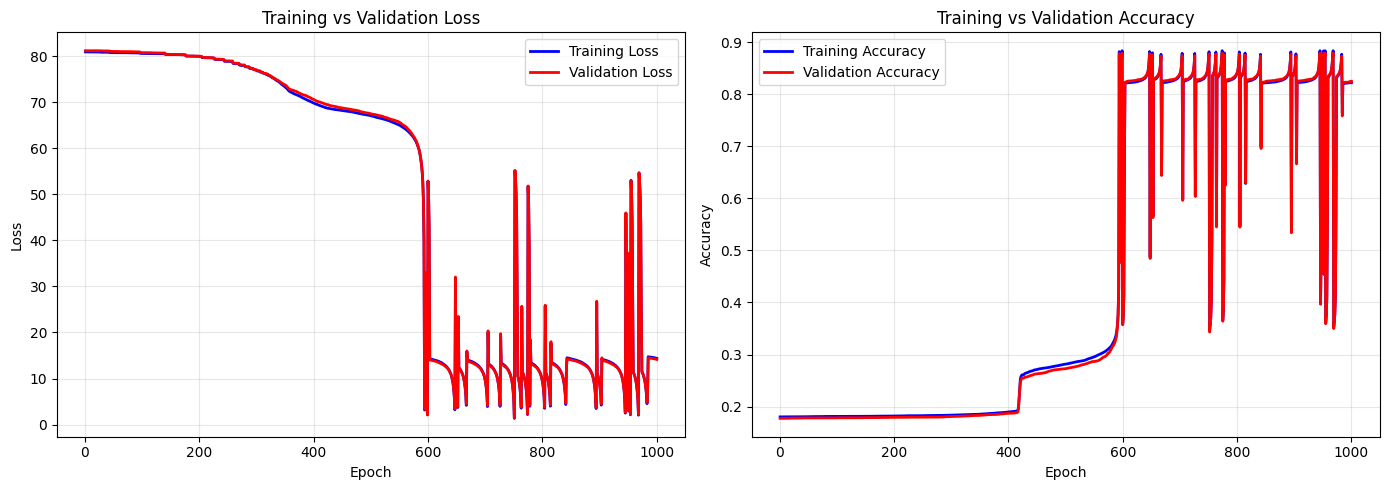


Final Train Accuracy: 82.18%
Final Val Accuracy: 82.47%


In [21]:
import torch.nn as nn
import torch.optim as optim
import torch

model = nn.Sequential(nn.Linear(2, 1), nn.Sigmoid())
optimizer = optim.SGD(model.parameters(), lr=0.001)
x_train_tensor = torch.FloatTensor(x_train)
y_train_tensor = torch.FloatTensor(y_train).unsqueeze(1)
x_val_tensor = torch.FloatTensor(x_val)
y_val_tensor = torch.FloatTensor(y_val).unsqueeze(1)
loss_fn = nn.BCELoss()

# Track metrics
train_loss_track = []
val_loss_track = []
train_accuracy_track = []
val_accuracy_track = []

for epoch in range(1000):
    # Forward pass
    y_pred_train = model(x_train_tensor)
    y_pred_val = model(x_val_tensor)
    
    # Calculate loss
    train_loss = loss_fn(y_pred_train, y_train_tensor)
    val_loss = loss_fn(y_pred_val, y_val_tensor)
    
    # Calculate accuracy
    train_pred_class = torch.round(y_pred_train)
    val_pred_class = torch.round(y_pred_val)
    train_accuracy = (train_pred_class == y_train_tensor).float().mean()
    val_accuracy = (val_pred_class == y_val_tensor).float().mean()
    
    # Track metrics
    train_loss_track.append(train_loss.item())
    val_loss_track.append(val_loss.item())
    train_accuracy_track.append(train_accuracy.item())
    val_accuracy_track.append(val_accuracy.item())
    
    # Backward pass
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Train Loss = {train_loss.item():.4f}, Train Acc = {train_accuracy.item():.4f}")

# Plot metrics
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

epochs = range(1, len(train_loss_track) + 1)

# Loss plot
ax1.plot(epochs, train_loss_track, 'b-', label='Training Loss', linewidth=2)
ax1.plot(epochs, val_loss_track, 'r-', label='Validation Loss', linewidth=2)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Training vs Validation Loss')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Accuracy plot
ax2.plot(epochs, train_accuracy_track, 'b-', label='Training Accuracy', linewidth=2)
ax2.plot(epochs, val_accuracy_track, 'r-', label='Validation Accuracy', linewidth=2)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_title('Training vs Validation Accuracy')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nFinal Train Accuracy: {train_accuracy_track[-1]*100:.2f}%")
print(f"Final Val Accuracy: {val_accuracy_track[-1]*100:.2f}%")
